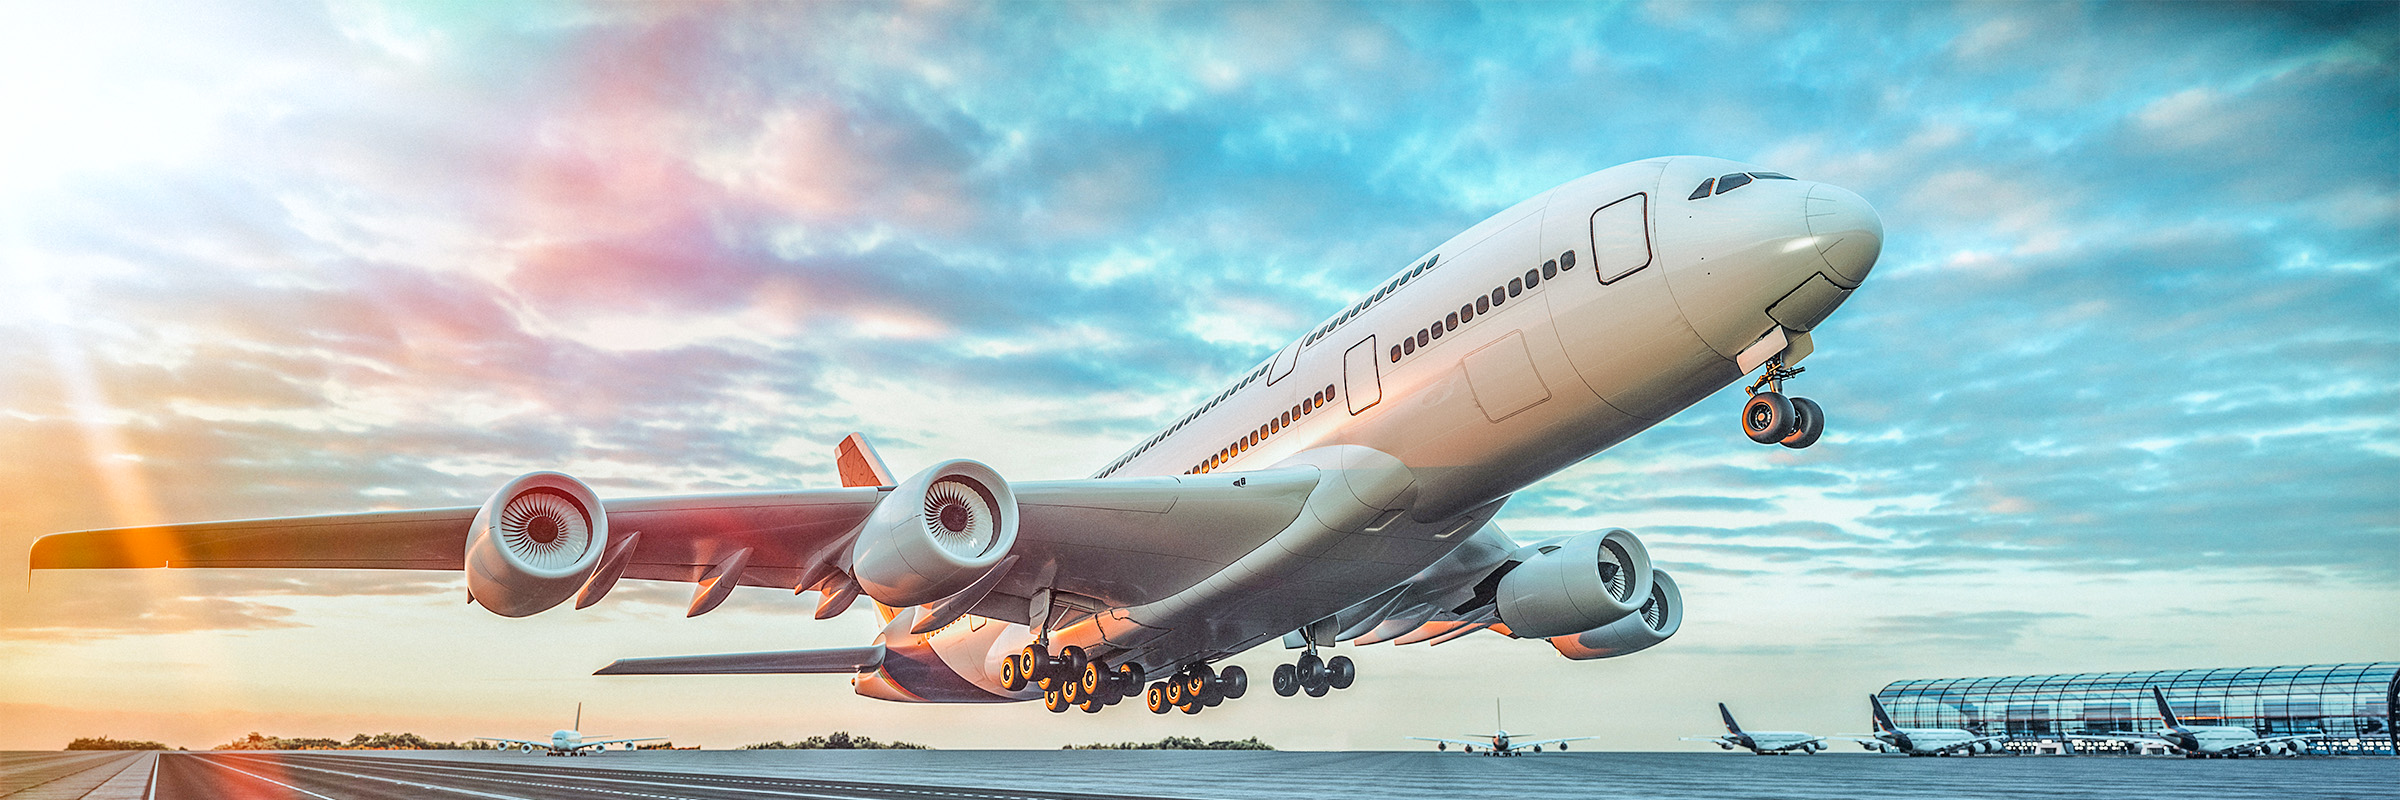


# Flight Forecast: Analysis of Flight Booking Data

<hr>

## <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
1. [Introduction🚀](#introduction)
2. [Data Analysis📊](#data-analysis)
3. [Conclusions and Key Insights📝](#conclusions)
4. [Improvements and Discussion🚧](#improvements)

<hr>

## Introduction🚀
<a id='introduction'></a>

For this particular case study, I have made use of the **[Flight Booking Dataset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)** from kaggle.

This exploratory data analysis primarily entailed descriptive analysis; a method characterized by the objective examination of the dataset's key attributes. Free from preconceived notions, the approach involved summarizing and delineating the dataset's core features. Employing a variety of techniques such as visualizations, and summary statistics, I aimed to unearth patterns, relationships, and intriguing features within the data. By organizing and presenting the data in a meaningful manner, this project aimed at understanding of factors influencing flight prices and empower travellers with the knowledge of making better decisions.

Data was collected for **50 days**, from February 11th to March 31st, 2022.


The various features of the cleaned dataset are explained below:
1) **Airline**: <br>The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) **Flight**: <br>Flight stores information regarding the plane's flight code. It is a categorical feature.

3) **Source City**: <br>City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) **Departure Time**: <br>This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) **Stops**: <br>A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) **Arrival Time**: <br>This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) **Destination City**: <br>City where the flight will land. It is a categorical feature having 6 unique cities.

8) **Class**: <br>A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) **Duration**:<br> A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) **Days Left**: <br>This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) **Price**: <br>Target variable stores information of the ticket price.

<hr>

## Data Analysis📊
<a id='data-analysis'></a>

### Reviewing the dataset

Let us begin by reviewing the dataset.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
flights = pd.read_csv('Clean_Dataset.csv')
flights.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

Identifying the key features essential for our analysis, we've identified the following crucial columns: *airline, flight, source city, departure time, stops, arrival time, destination city, class, duration, days left, and price*. 

To streamline our dataset and optimize our analysis, we will proceed to drop redundant columns (*flight, Unnamed: 0*) that do not contribute substantially to our analysis.

For this analysis, we will also be ignoring the `stops` and `duration` attributes.

In [3]:
# Dropping the 'flight' column
flights.drop(columns=['flight'])
flights.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [4]:
# Dropping the useless column 'Unnamed: 0'
flights = flights.drop(columns = ['Unnamed: 0'])
flights.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

### Analyzing independent variables 

We will now analyze the impact of various independent variables on the target variable, `'price'`. 

#### Analyzing the `airline` attribute : 

In [5]:
# Getting the number of distinct values of the 'airline' attribute
flights['airline'].nunique()

6

In [6]:
# Getting the list of distinct values of the 'airline' attribute
flights['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
# Examining the distribution and count representation of each airline across total number of flights over 50 days
flights['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

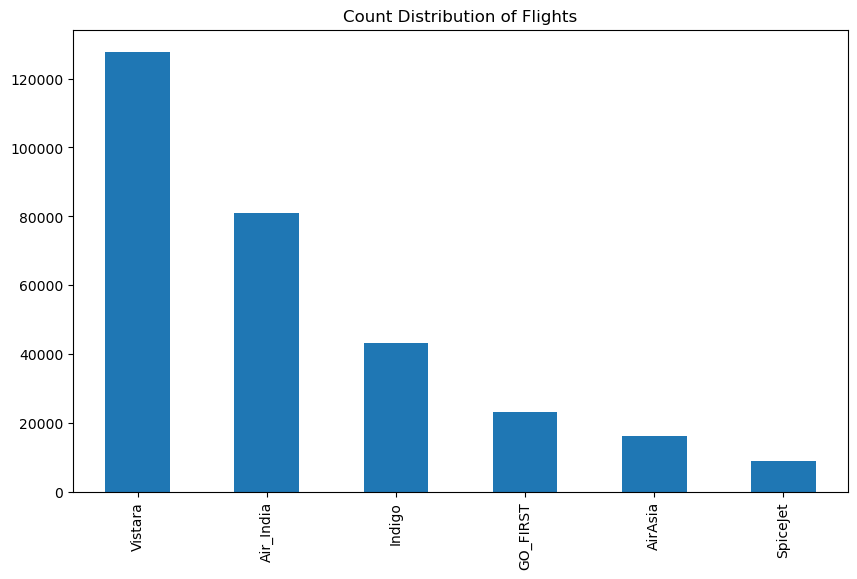

In [8]:
# Plotting the distribution of flights
plt.figure(figsize=(10,6))
flights['airline'].value_counts().plot.bar();
plt.title('Count Distribution of Flights');

In [9]:
# Examining the percentage representation of each airline across total number of flights over 50 days
flights['airline'].value_counts() / len(flights) * 100

Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: airline, dtype: float64

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> **Vistara** has the largest share of total number of flights over 50 days among all airlines

Since our target variable happens to be `price`, we will assess this attribute based on the median price, consistency (absence of outliers), and affordability (range of prices)

In [10]:
# Obtaining the median price for each airline.
flights[['airline', 'price']].groupby('airline').median()

price
airline           
AirAsia     3276.0
Air_India  11520.0
GO_FIRST    5336.0
Indigo      4453.0
SpiceJet    5654.0
Vistara    15543.0

In [11]:
# Obtaining the maximum price for each airline.
flights[['airline', 'price']].groupby('airline').max()

price
airline          
AirAsia     31917
Air_India   90970
GO_FIRST    32803
Indigo      31952
SpiceJet    34158
Vistara    123071

In [12]:
# Obtaining the minimum price for each airline.
flights[['airline', 'price']].groupby('airline').min()

price
airline         
AirAsia     1105
Air_India   1526
GO_FIRST    1105
Indigo      1105
SpiceJet    1106
Vistara     1714

In [13]:
# Calculating the difference between maximum and minimum values for each airline
flights[['airline', 'price']].groupby('airline').max() - flights[['airline', 'price']].groupby('airline').min()

price
airline          
AirAsia     30812
Air_India   89444
GO_FIRST    31698
Indigo      30847
SpiceJet    33052
Vistara    121357

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> Calculating the difference between the maximum and minimum values for each airline provides insights into the price variability within each carrier. <br>
    
> A larger difference in **AirIndia** and **Vistara** airlines, suggests a wider range of prices, indicating greater variability in ticket costs. This could suggest that the airline offers a broader spectrum of services or ticket options, which might include both affordable and premium choices. <br>

> On the other hand, a smaller differences in **AirAsia, GoFirst, SpiceJet** and **Indigo** implies more consistency in pricing. This could indicate a more predictable and potentially affordable pricing structure. </div>


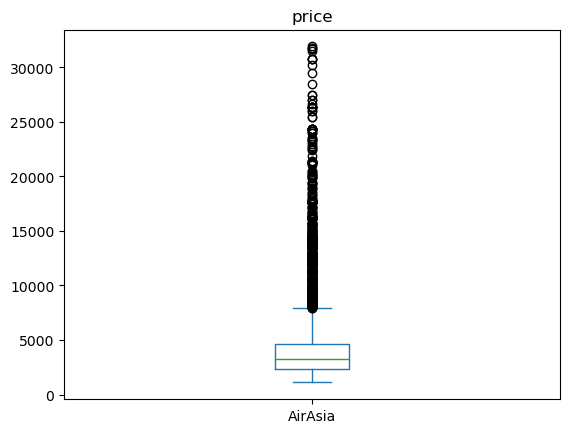

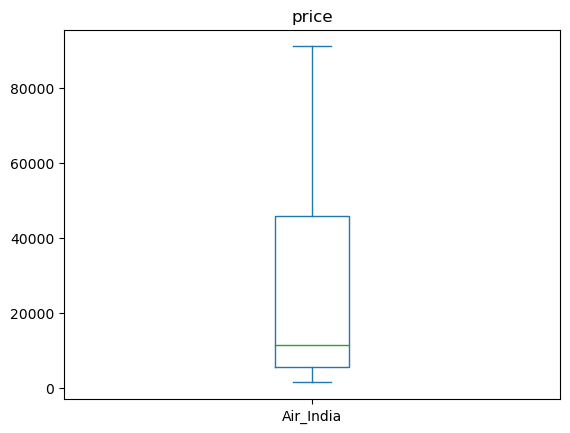

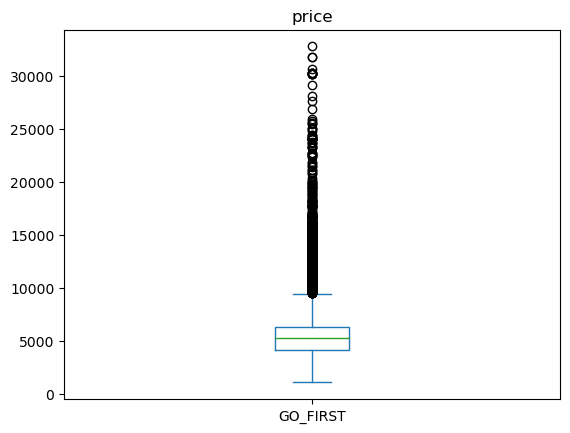

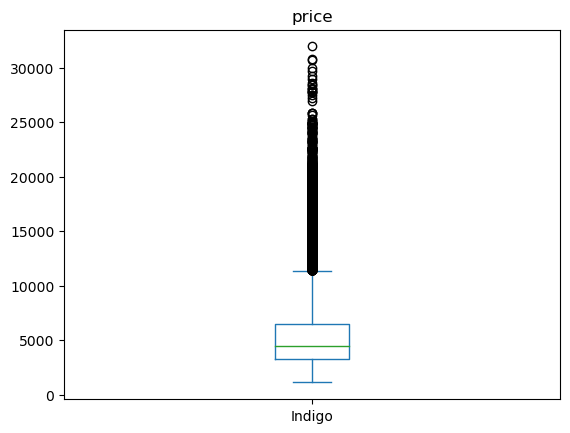

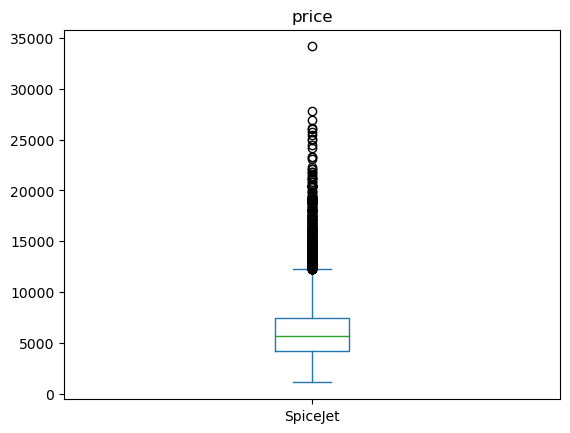

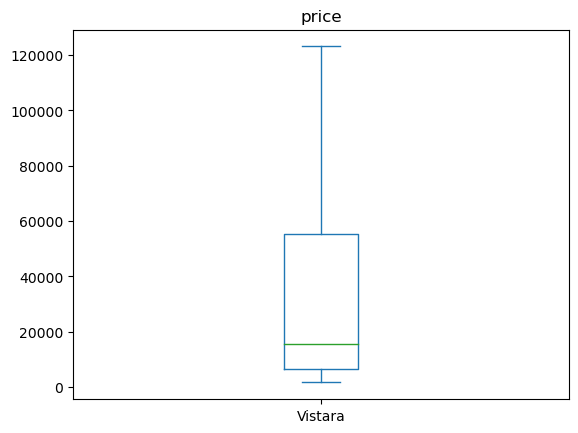

In [14]:
# Visualize the distribution of prices for each airline using box plots
flights[['airline', 'price']].groupby('airline').plot.box('airline');

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> In the given results, the median price, shown by the line inside each box, is not perfectly centered, indicating skewness in the distribution of airline prices. The varying positions suggest an asymmetric distribution. 

> The length of the box (interquartile range) reflects price spread; a longer box implies greater variability. 

> Numerous outliers indicate high price variability, suggesting external factors influencing price fluctuations.

> The absence of outliers in an airline's pricing data, like in **AirIndia** and **Vistara** suggests greater consistency, indicating that prices are more closely clustered around a central tendency. 

Let's further analyze how price can be affected by the `'class'` of a given airline 

#### Analyzing the `class` attribute :

Text(0.5, 1.0, 'Class-Wise Prices')

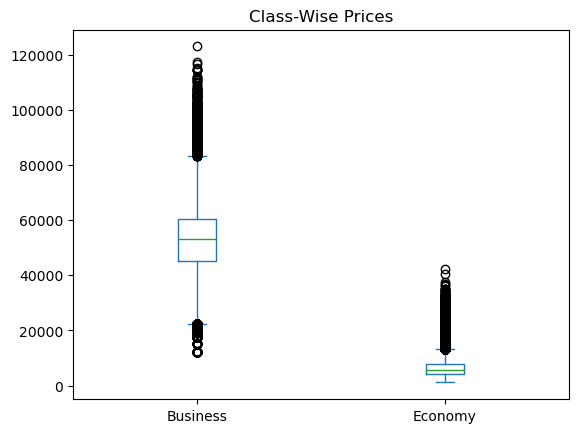

In [15]:
# Understanding the distribution of prices by class of the airline
flights[['class','price']].plot.box(column="price", by="class")
plt.title('Class-Wise Prices')

price
airline                               
AirAsia    Axes(0.125,0.11;0.775x0.77)
Air_India  Axes(0.125,0.11;0.775x0.77)
GO_FIRST   Axes(0.125,0.11;0.775x0.77)
Indigo     Axes(0.125,0.11;0.775x0.77)
SpiceJet   Axes(0.125,0.11;0.775x0.77)
Vistara    Axes(0.125,0.11;0.775x0.77)

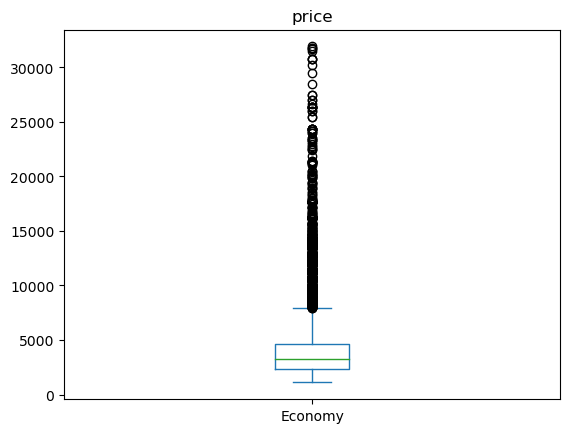

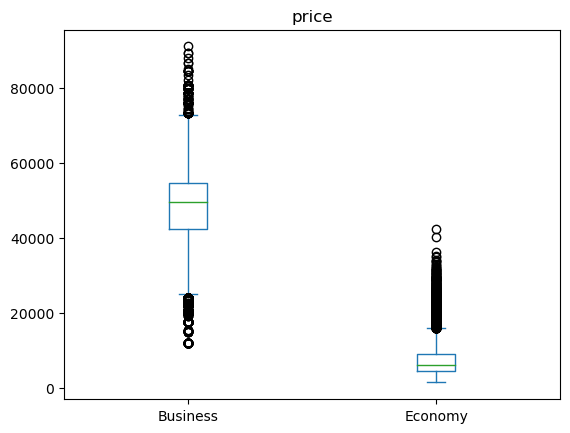

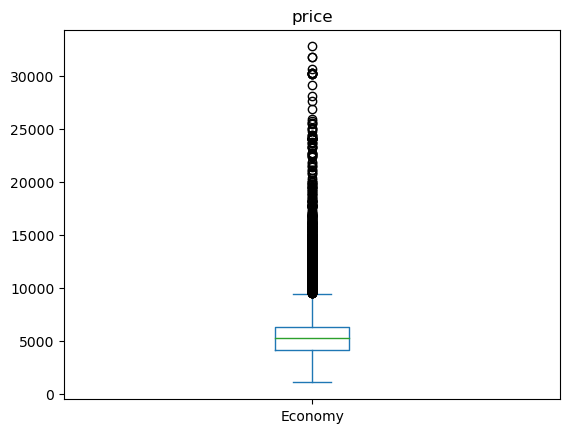

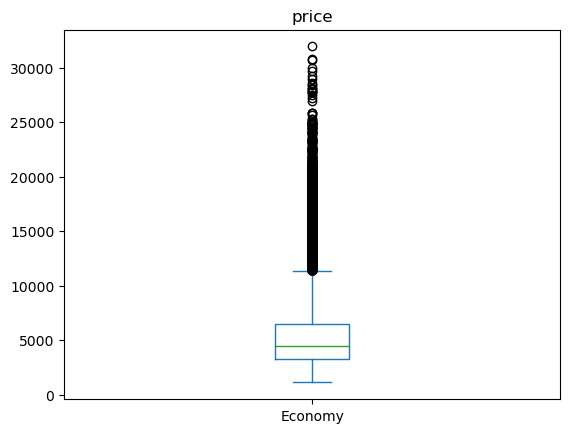

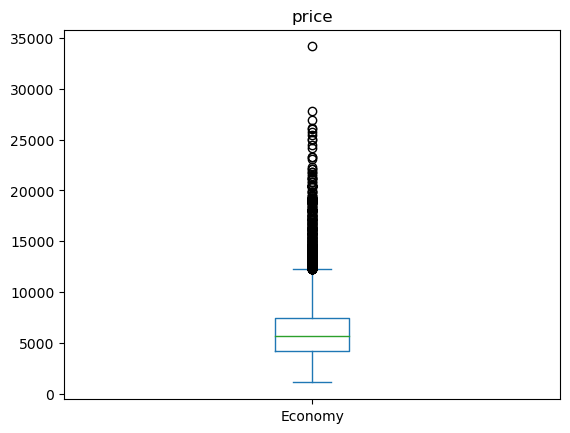

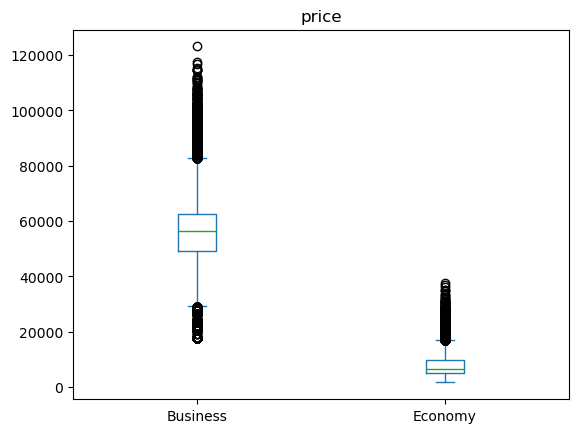

In [16]:
flights.groupby('airline').plot.box(column="price", by=["class"])

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> Adding to the obvious fact, that the median price of 'business' class is higher than 'economy' class, the prices of both classes of airlines show high variability, but the median price is fairly central, indicating distribution of the prices is roughly symmetric.

Let's understand how each airline's class affects the `price` variable -

In [17]:
# Creating a new dataframe for each airline's class-wise price analysis
air_asia_classwise_price = flights.loc[flights['airline'] == 'AirAsia']
air_asia_classwise_price.head()

airline  flight source_city departure_time stops   arrival_time  \
2   AirAsia  I5-764       Delhi  Early_Morning  zero  Early_Morning   
18  AirAsia  I5-747       Delhi        Evening   one  Early_Morning   
19  AirAsia  I5-747       Delhi        Evening   one        Morning   
27  AirAsia  I5-744       Delhi        Morning   one      Afternoon   
48  AirAsia  I5-784       Delhi        Evening   one  Early_Morning   

   destination_city    class  duration  days_left  price  
2            Mumbai  Economy      2.17          1   5956  
18           Mumbai  Economy     12.25          1   5949  
19           Mumbai  Economy     16.33          1   5949  
27           Mumbai  Economy      5.83          1   8869  
48           Mumbai  Economy     15.17          1  12539

In [18]:
# Resetting the index
air_asia_classwise_price.reset_index(drop = True).head()

airline  flight source_city departure_time stops   arrival_time  \
0  AirAsia  I5-764       Delhi  Early_Morning  zero  Early_Morning   
1  AirAsia  I5-747       Delhi        Evening   one  Early_Morning   
2  AirAsia  I5-747       Delhi        Evening   one        Morning   
3  AirAsia  I5-744       Delhi        Morning   one      Afternoon   
4  AirAsia  I5-784       Delhi        Evening   one  Early_Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5956  
1           Mumbai  Economy     12.25          1   5949  
2           Mumbai  Economy     16.33          1   5949  
3           Mumbai  Economy      5.83          1   8869  
4           Mumbai  Economy     15.17          1  12539

In [19]:
# Analyzing the basic statistics of the dataset
air_asia_classwise_price[['class', 'price']].groupby('class').describe()

price                                                            \
           count         mean          std     min     25%     50%     75%   
class                                                                        
Economy  16098.0  4091.072742  2824.055172  1105.0  2361.0  3276.0  4589.0   

                  
             max  
class             
Economy  31917.0

In [20]:
# Creating a sub-dataframe with only 'class' and 'price' attributes, and renaming the index of the dataframe according 
# to the airline's name
air_asia_classwise_price.loc[air_asia_classwise_price['class'] == 'Economy', 'class'] = 'AirAsia Economy'
air_asia_classwise_price = air_asia_classwise_price[['class', 'price']].groupby('class').median()
air_asia_classwise_price

price
class                  
AirAsia Economy  3276.0

**Performing the same analysis for each airline** -

In [21]:
# Extracting and summarizing class-wise prices for Indigo airline flights
indigo_classwise_price = flights.loc[flights['airline'] == 'Indigo']
indigo_classwise_price.reset_index(drop = True).head()
indigo_classwise_price[['class', 'price']].groupby('class').describe()

price                                                            \
           count         mean          std     min     25%     50%     75%   
class                                                                        
Economy  43120.0  5324.216303  3268.894831  1105.0  3219.0  4453.0  6489.0   

                  
             max  
class             
Economy  31952.0

In [22]:
# Renaming calculating the median prices for each class
indigo_classwise_price.loc[indigo_classwise_price['class'] == 'Economy', 'class'] = 'Indigo Economy'
indigo_classwise_price =indigo_classwise_price[['class', 'price']].groupby('class').median()
indigo_classwise_price

price
class                 
Indigo Economy  4453.0

In [23]:
# Extracting and summarizing class-wise prices for SpiceJet airline flights
spicejet_classwise_price = flights.loc[flights['airline'] == 'SpiceJet']
spicejet_classwise_price.reset_index(drop = True).head()
spicejet_classwise_price[['class', 'price']].groupby('class').describe()

price                                                            \
          count         mean          std     min     25%     50%     75%   
class                                                                       
Economy  9011.0  6179.278881  2999.630406  1106.0  4197.0  5654.0  7412.0   

                  
             max  
class             
Economy  34158.0

In [24]:
# Renaming calculating the median prices for each class
spicejet_classwise_price.loc[spicejet_classwise_price['class'] == 'Economy', 'class'] = 'SpiceJet Economy'
spicejet_classwise_price = spicejet_classwise_price[['class', 'price']].groupby('class').median()
spicejet_classwise_price

price
class                   
SpiceJet Economy  5654.0

In [25]:
# Extracting and summarizing class-wise prices for Vistara airline flights
vistara_classwise_price = flights.loc[flights['airline'] == 'Vistara']
vistara_classwise_price.reset_index(drop = True).head()
vistara_classwise_price[['class', 'price']].groupby('class').describe()

price                                                         \
            count          mean           std      min      25%      50%   
class                                                                      
Business  60589.0  55477.027777  13225.349062  17604.0  49207.0  56588.0   
Economy   67270.0   7806.943645   3854.572559   1714.0   5206.0   6461.0   

                             
              75%       max  
class                        
Business  62591.0  123071.0  
Economy    9945.0   37646.0

In [26]:
# Renaming calculating the median prices for each class
vistara_classwise_price.loc[vistara_classwise_price['class'] == 'Business', 'class'] = 'Vistara Business'
vistara_classwise_price.loc[vistara_classwise_price['class'] == 'Economy', 'class'] = 'vistara Economy'
vistara_classwise_price = vistara_classwise_price[['class', 'price']].groupby('class').median()
vistara_classwise_price

price
class                    
Vistara Business  56588.0
vistara Economy    6461.0

In [27]:
# Extracting and summarizing class-wise prices for Go First airline flights
goFirst_classwise_price = flights.loc[flights['airline'] == 'GO_FIRST']
goFirst_classwise_price.reset_index(drop = True).head()
goFirst_classwise_price[['class', 'price']].groupby('class').describe()

price                                                           \
           count         mean         std     min     25%     50%     75%   
class                                                                       
Economy  23173.0  5652.007595  2513.86556  1105.0  4205.0  5336.0  6324.0   

                  
             max  
class             
Economy  32803.0

In [28]:
# Renaming calculating the median prices for each class
goFirst_classwise_price.loc[goFirst_classwise_price['class'] == 'Economy', 'class'] = 'Go First Economy'
goFirst_classwise_price = goFirst_classwise_price[['class', 'price']].groupby('class').median()
goFirst_classwise_price

price
class                   
Go First Economy  5336.0

In [29]:
# Extracting and summarizing class-wise prices for Air India airline flights
AirIndia_classwise_price = flights.loc[flights['airline'] == 'Air_India']
AirIndia_classwise_price.reset_index(drop = True).head()
AirIndia_classwise_price[['class', 'price']].groupby('class').describe()

price                                                         \
            count          mean           std      min      25%      50%   
class                                                                      
Business  32898.0  47131.039212  10521.926556  12000.0  42457.0  49613.0   
Economy   47994.0   7313.682169   3989.521406   1526.0   4556.0   6082.0   

                            
              75%      max  
class                       
Business  54608.0  90970.0  
Economy    9135.0  42349.0

In [30]:
# Renaming calculating the median prices for each class
AirIndia_classwise_price.loc[AirIndia_classwise_price['class'] == 'Business', 'class'] = 'Air India Business'
AirIndia_classwise_price.loc[AirIndia_classwise_price['class'] == 'Economy', 'class'] = 'Air India Economy'
AirIndia_classwise_price = AirIndia_classwise_price[['class', 'price']].groupby('class').median()
AirIndia_classwise_price

price
class                      
Air India Business  49613.0
Air India Economy    6082.0

Text(0.5, 1.0, 'Median Price from All Airlines by Class')

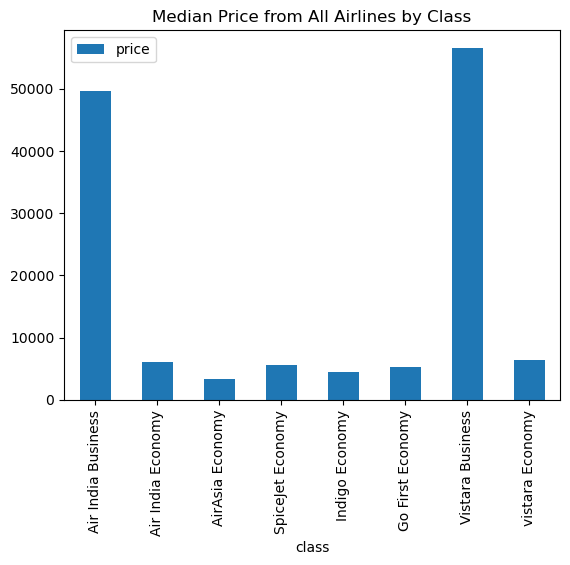

In [31]:
# Concatenate classwise price data from multiple airlines and visualize the median prices
all_airlines = pd.concat([
    AirIndia_classwise_price,
    air_asia_classwise_price,
    spicejet_classwise_price,
    indigo_classwise_price,
    goFirst_classwise_price,
    vistara_classwise_price
])
all_airlines.plot.bar()
plt.title('Median Price from All Airlines by Class')

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> Since there are significant variations or outliers in the ticket prices, the median provides a better measure of central tendency, since it is not sensitive to extreme values (outliers)

> From the above chart, we can see that the median price of **Air India Business** is lower than **Vistara Business**, and the median price of **AirAsia Economy** is the lowest

Let's further understand the maximum, minimum and the range of prices of airlines, by `class` :

In [32]:
# Extracting maximum prices for each flight class from different airlines and renaming columns for clarity
vistara_max = flights[['class','price']].loc[flights['airline'] == 'Vistara'].groupby('class').max()
vistara_max = vistara_max.rename(columns = {'price':'price (max)'})

goFirst_max = flights[['class','price']].loc[flights['airline'] == 'GO_FIRST'].groupby('class').max()
goFirst_max = goFirst_max.rename(columns = {'price':'price (max)'})

air_asia_max = flights[['class','price']].loc[flights['airline'] == 'AirAsia'].groupby('class').max()
air_asia_max = air_asia_max.rename(columns = {'price':'price (max)'})

indigo_max = flights[['class','price']].loc[flights['airline'] == 'Indigo'].groupby('class').max()
indigo_max = indigo_max.rename(columns = {'price':'price (max)'})

AirIndia_max = flights[['class','price']].loc[flights['airline'] == 'Air_India'].groupby('class').max()
AirIndia_max = AirIndia_max.rename(columns = {'price':'price (max)'})

spicejet_max = flights[['class','price']].loc[flights['airline'] == 'SpiceJet'].groupby('class').max()
spicejet_max = spicejet_max.rename(columns = {'price':'price (max)'})

list1 = vistara_max.index.tolist()
vistara_list = []
for item in list1:
    vistara_list.append('Vistara ' + item)
vistara_max.index = vistara_list

list2 = goFirst_max.index.tolist()
goFirst_list = []
for item in list2:
    goFirst_list.append('Go First ' + item)
goFirst_max.index = goFirst_list

list3 = air_asia_max.index.tolist()
air_asia_list = []
for item in list3:
    air_asia_list.append('Air Asia ' + item)
air_asia_max.index = air_asia_list

list4 = indigo_max.index.tolist()
indigo_list = []
for item in list4:
    indigo_list.append('Indigo ' + item)
indigo_max.index = indigo_list

list5 = AirIndia_max.index.tolist()
AirIndia_list = []
for item in list5:
    AirIndia_list.append('Air India ' + item)
AirIndia_max.index = AirIndia_list

list6 = spicejet_max.index.tolist()
spicejet_list = []
for item in list6:
    spicejet_list.append('SpiceJet ' + item)
spicejet_max.index = spicejet_list

In [33]:
# Extracting minimum prices for each flight class from different airlines and renaming columns for clarity
vistara_min = flights[['class','price']].loc[flights['airline'] == 'Vistara'].groupby('class').min()
vistara_min = vistara_min.rename(columns = {'price':'price (min)'})

goFirst_min = flights[['class','price']].loc[flights['airline'] == 'GO_FIRST'].groupby('class').min()
goFirst_min = goFirst_min.rename(columns = {'price':'price (min)'})

air_asia_min = flights[['class','price']].loc[flights['airline'] == 'AirAsia'].groupby('class').min()
air_asia_min = air_asia_min.rename(columns = {'price':'price (min)'})

indigo_min = flights[['class','price']].loc[flights['airline'] == 'Indigo'].groupby('class').min()
indigo_min = indigo_min.rename(columns = {'price':'price (min)'})

AirIndia_min = flights[['class','price']].loc[flights['airline'] == 'Air_India'].groupby('class').min()
AirIndia_min = AirIndia_min.rename(columns = {'price':'price (min)'})

spicejet_min = flights[['class','price']].loc[flights['airline'] == 'SpiceJet'].groupby('class').min()
spicejet_min = spicejet_min.rename(columns = {'price':'price (min)'})

list1 = vistara_min.index.tolist()
vistara_list = []
for item in list1:
    vistara_list.append('Vistara ' + item)
vistara_min.index = vistara_list

list2 = goFirst_min.index.tolist()
goFirst_list = []
for item in list2:
    goFirst_list.append('Go First ' + item)
goFirst_min.index = goFirst_list

list3 = air_asia_min.index.tolist()
air_asia_list = []
for item in list3:
    air_asia_list.append('Air Asia ' + item)
air_asia_min.index = air_asia_list

list4 = indigo_min.index.tolist()
indigo_list = []
for item in list4:
    indigo_list.append('Indigo ' + item)
indigo_min.index = indigo_list

list5 = AirIndia_min.index.tolist()
AirIndia_list = []
for item in list5:
    AirIndia_list.append('Air India ' + item)
AirIndia_min.index = AirIndia_list

list6 = spicejet_min.index.tolist()
spicejet_list = []
for item in list6:
    spicejet_list.append('SpiceJet ' + item)
spicejet_min.index = spicejet_list

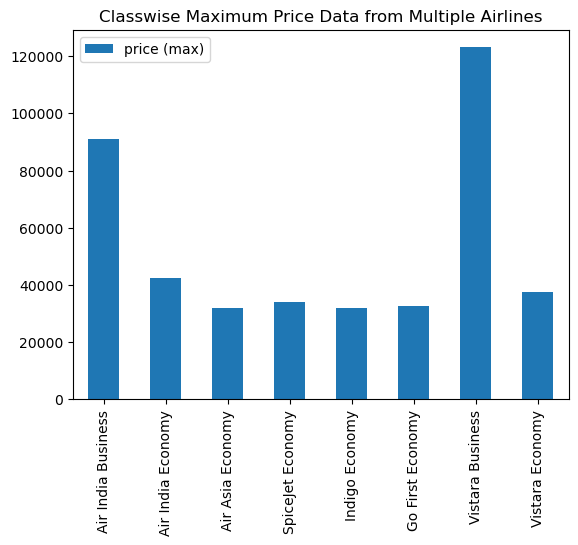

In [34]:
# Concatenate classwise price data from multiple airlines and visualize the maximum prices
all_airlines_max_price = pd.concat([
    AirIndia_max,
    air_asia_max,
    spicejet_max,
    indigo_max,
    goFirst_max,
    vistara_max
])
all_airlines_max_price.plot.bar()
plt.title('Classwise Maximum Price Data from Multiple Airlines');

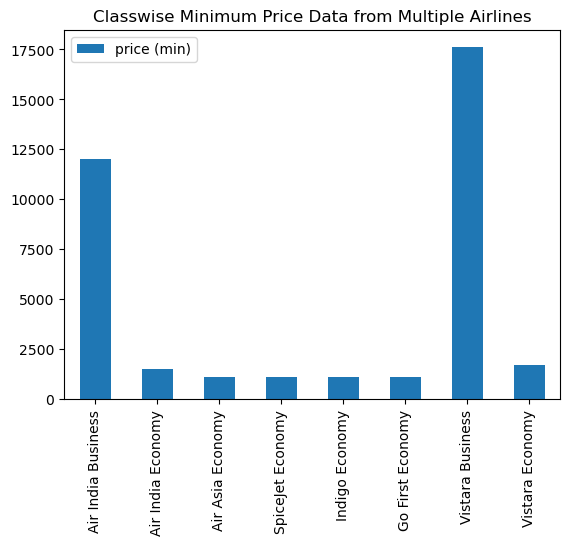

In [35]:
# Concatenate classwise price data from multiple airlines and visualize the minimum prices
all_airlines_min_price = pd.concat([
    AirIndia_min,
    air_asia_min,
    spicejet_min,
    indigo_min,
    goFirst_min,
    vistara_min
])
all_airlines_min_price.plot.bar();
plt.title('Classwise Minimum Price Data from Multiple Airlines');

In [36]:
# Calculate the price difference between maximum and minimum prices for each airline
all_airlines_diff = pd.concat([all_airlines_max_price, all_airlines_min_price['price (min)']], axis=1)
all_airlines_diff['difference'] = all_airlines_diff['price (max)'] - all_airlines_diff['price (min)']
all_airlines_diff

price (max)  price (min)  difference
Air India Business        90970        12000       78970
Air India Economy         42349         1526       40823
Air Asia Economy          31917         1105       30812
SpiceJet Economy          34158         1106       33052
Indigo Economy            31952         1105       30847
Go First Economy          32803         1105       31698
Vistara Business         123071        17604      105467
Vistara Economy           37646         1714       35932

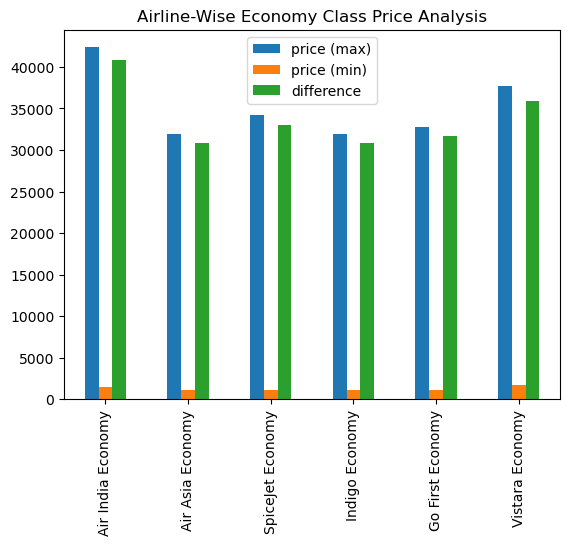

In [37]:
# Plotting bar chart for differences in data related to Economy class across all airlines
all_airlines_diff.loc[all_airlines_diff.index.str.contains('Economy')].plot.bar()
plt.title('Airline-Wise Economy Class Price Analysis');

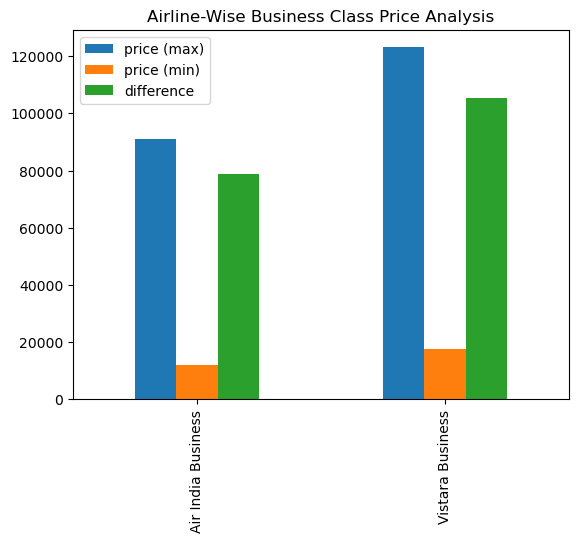

In [38]:
# Plotting bar chart for differences in data related to Business class across all airlines
all_airlines_diff.loc[all_airlines_diff.index.str.contains('Business')].plot.bar()
plt.title('Airline-Wise Business Class Price Analysis');

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> **Air India** and **Vistara** offer both business class and economy class services, and the economy class prices turn out to be higher than the competitors, with **Indigo** and **Air Asia** being the most affordable brands

#### Analyzing the `source_city` attribute :

array([<Axes: title={'center': 'Bangalore'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Chennai'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Delhi'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Hyderabad'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Kolkata'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Mumbai'}, ylabel='Frequency'>],
      dtype=object)

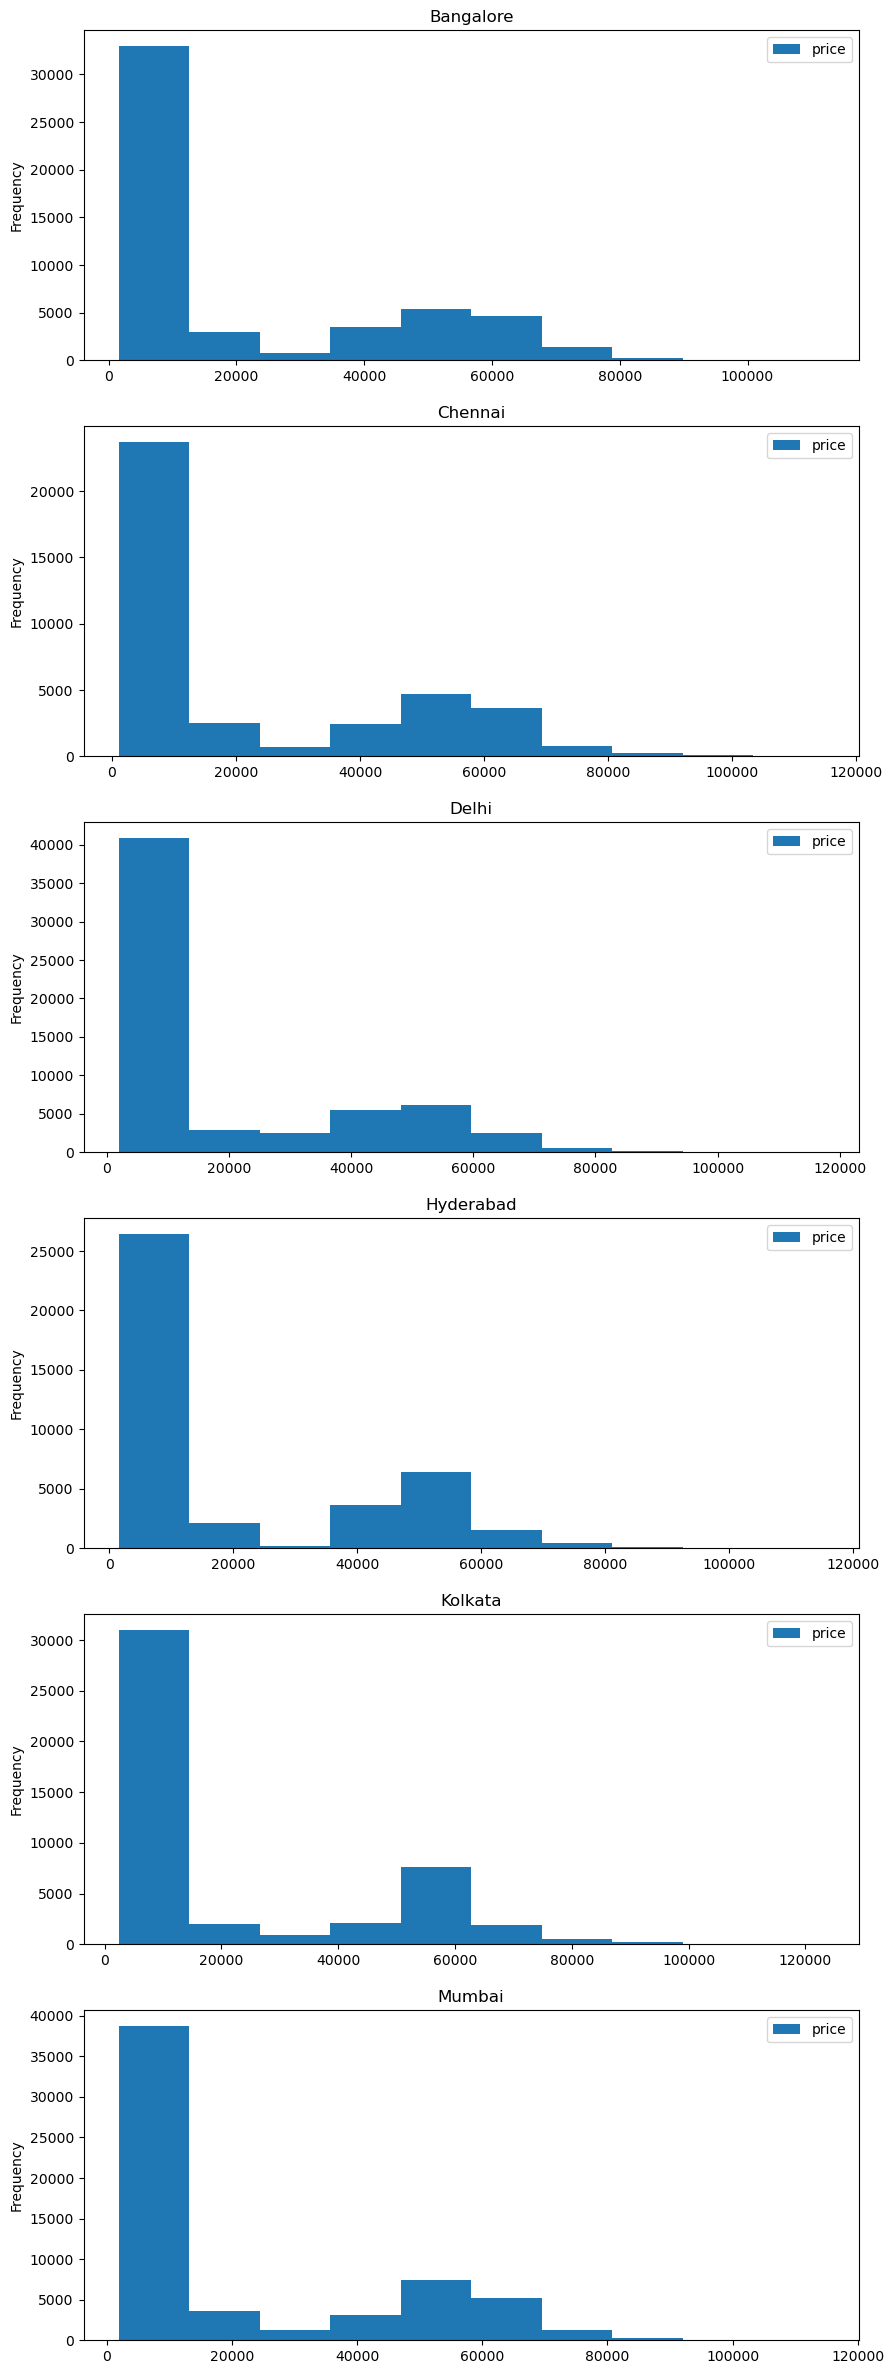

In [39]:
# Plotting a histogram of flight prices by source city with specified figure size
flights[['airline','source_city', 'price']].plot.hist(by = 'source_city', figsize=(10, 30))

Text(0.5, 1.0, 'Price Distribution')

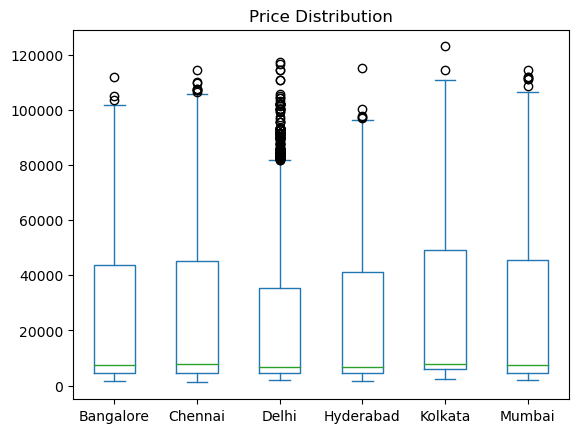

In [40]:
# Visualize the distribution of flight prices by source city 
flights[['airline','source_city', 'price']].plot.box(by = 'source_city')
plt.title('Price Distribution')

In [41]:
# Calculate the median price for each source city 
flights[['source_city', 'price']].groupby('source_city').median()

price
source_city        
Bangalore    7488.0
Chennai      7846.0
Delhi        6840.0
Hyderabad    6855.0
Kolkata      7958.0
Mumbai       7413.0

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> Considering the price distribution based on the `source_city`, there is not much variability. Flights taking of from **Delhi** show higher variability and lowest median price, while the flights taking off from **Kolkata** can tend to be pricier, but more consistent.

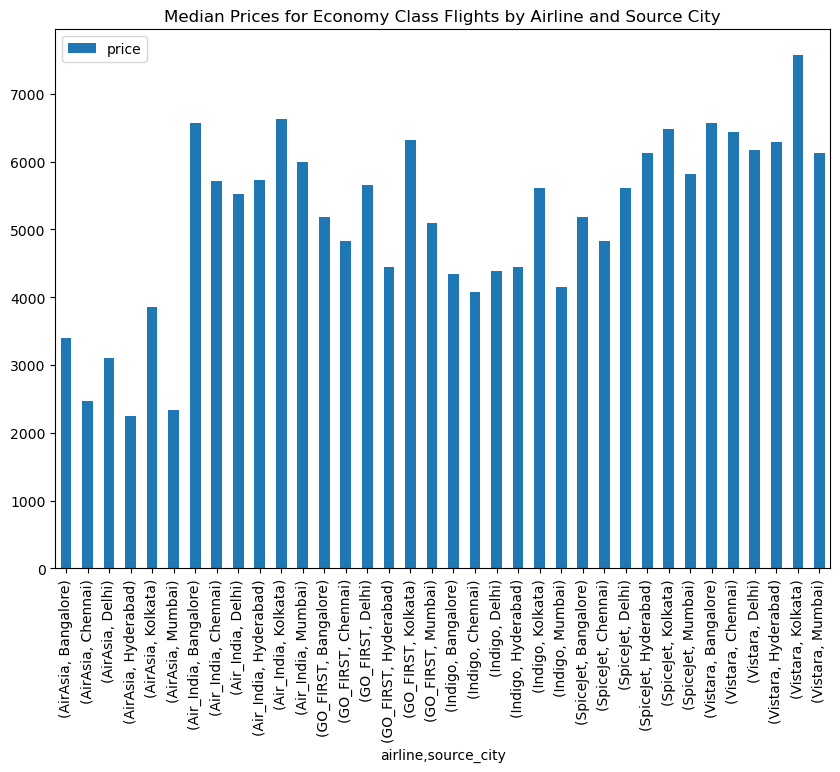

In [42]:
# Plotting a bar chart of median prices for Economy class flights, grouped by airline and source city
flights[['airline', 'price', 'source_city']].loc[(flights['class'] == 'Economy')].groupby(['airline','source_city']).median(numeric_only=True).plot.bar(figsize=(10, 7))
plt.title('Median Prices for Economy Class Flights by Airline and Source City');

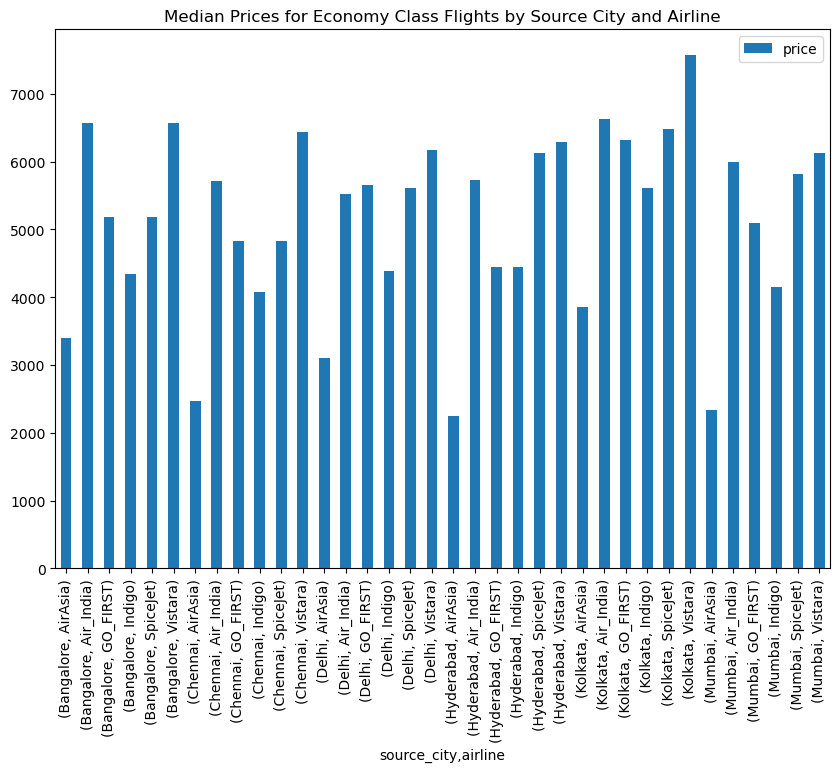

In [43]:
# Plotting by grouping source city and airline in different order
flights[['airline', 'price', 'source_city']].loc[(flights['class'] == 'Economy')].groupby(['source_city','airline',]).median(numeric_only=True).plot.bar(figsize=(10, 7))
plt.title('Median Prices for Economy Class Flights by Source City and Airline');

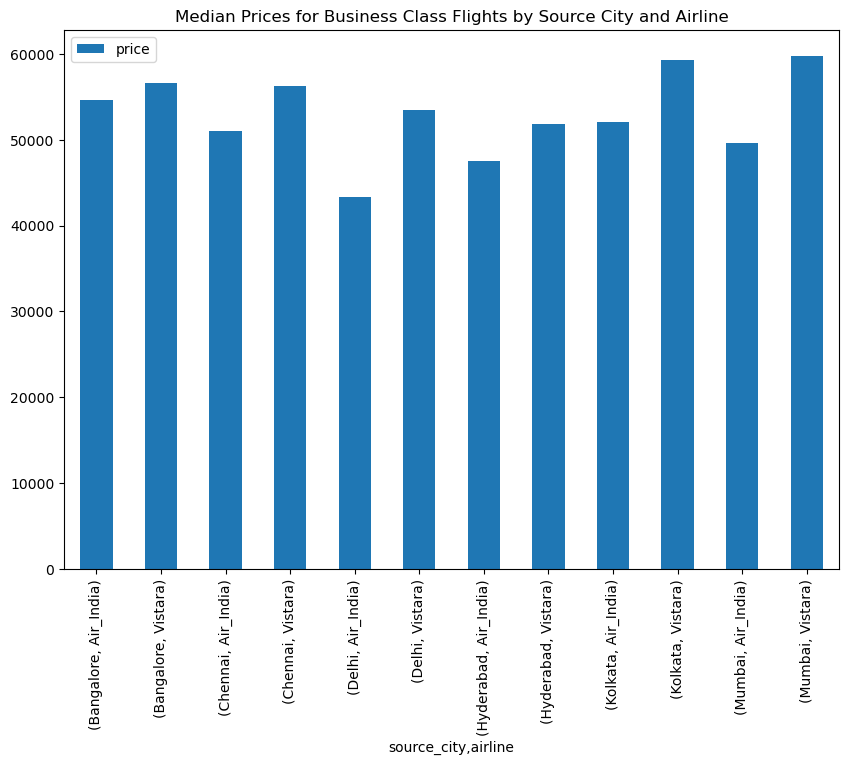

In [44]:
# Plotting a bar chart of median prices for Economy class flights, grouped by airline and source city
flights[['airline', 'price', 'source_city']].loc[(flights['class'] == 'Business')].groupby(['source_city','airline']).median(numeric_only=True).plot.bar(figsize=(10, 7))
plt.title('Median Prices for Business Class Flights by Source City and Airline');

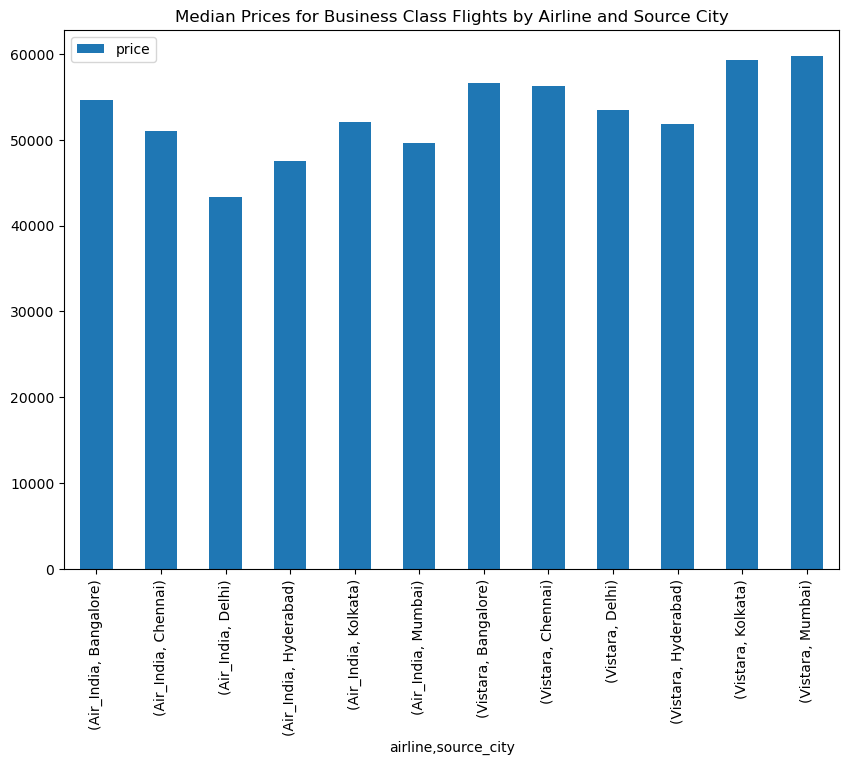

In [45]:
# Plotting by grouping source city and airline in different order
flights[['airline', 'price', 'source_city']].loc[(flights['class'] == 'Business')].groupby(['airline','source_city']).median(numeric_only=True).plot.bar(figsize=(10, 7));
plt.title('Median Prices for Business Class Flights by Airline and Source City');

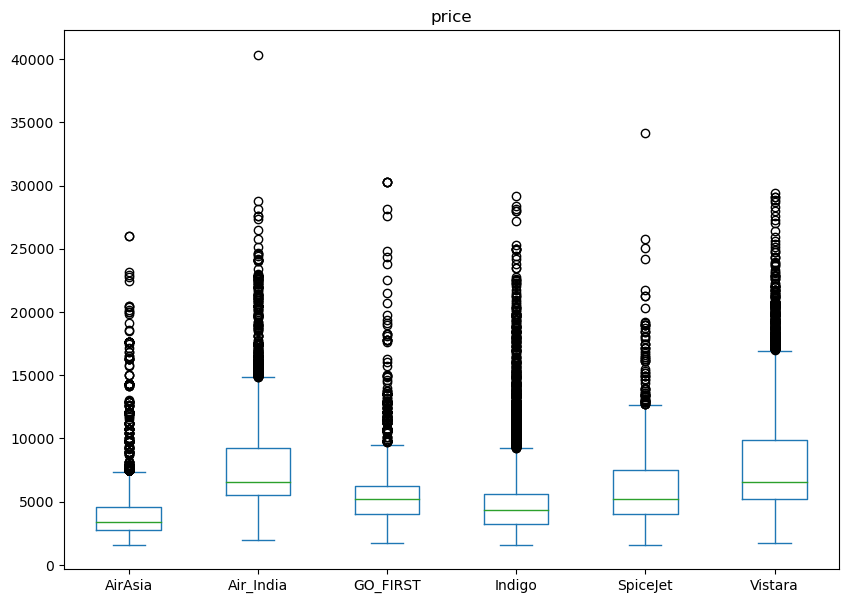

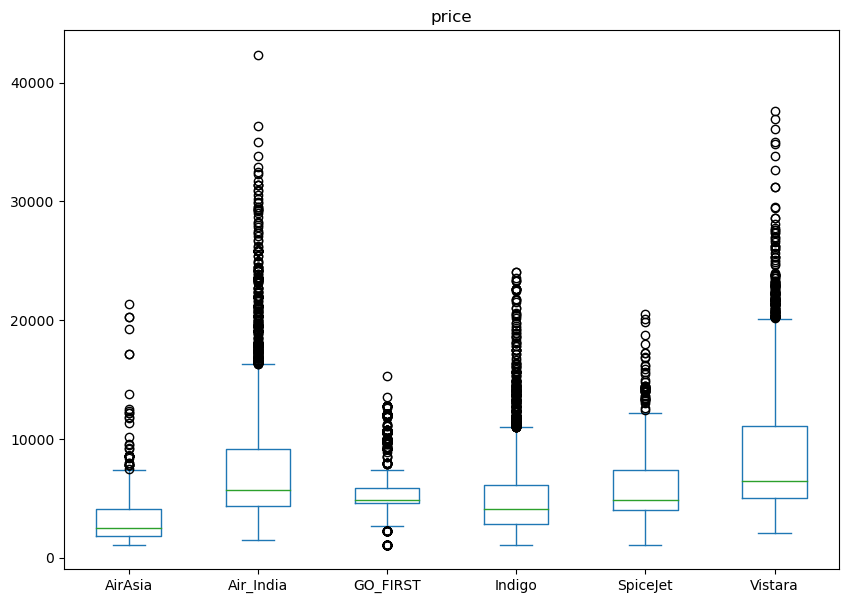

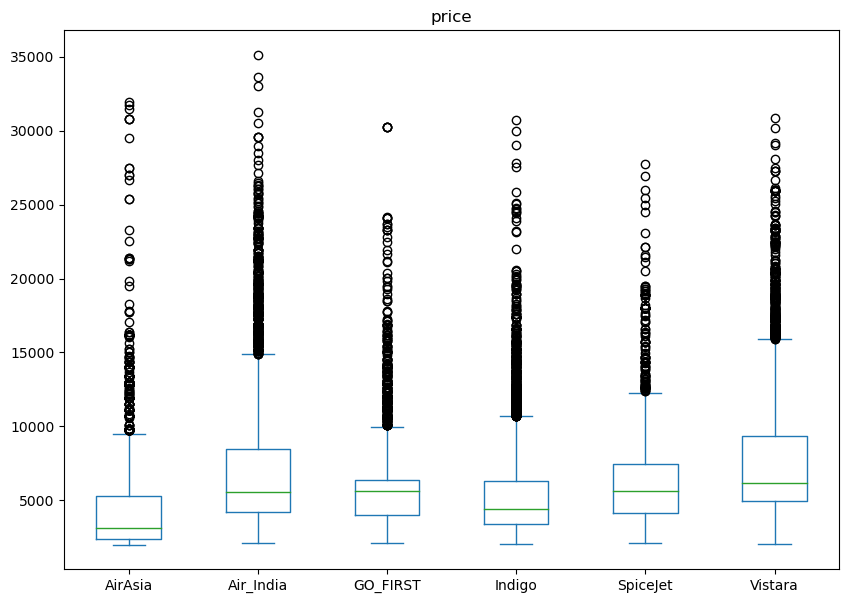

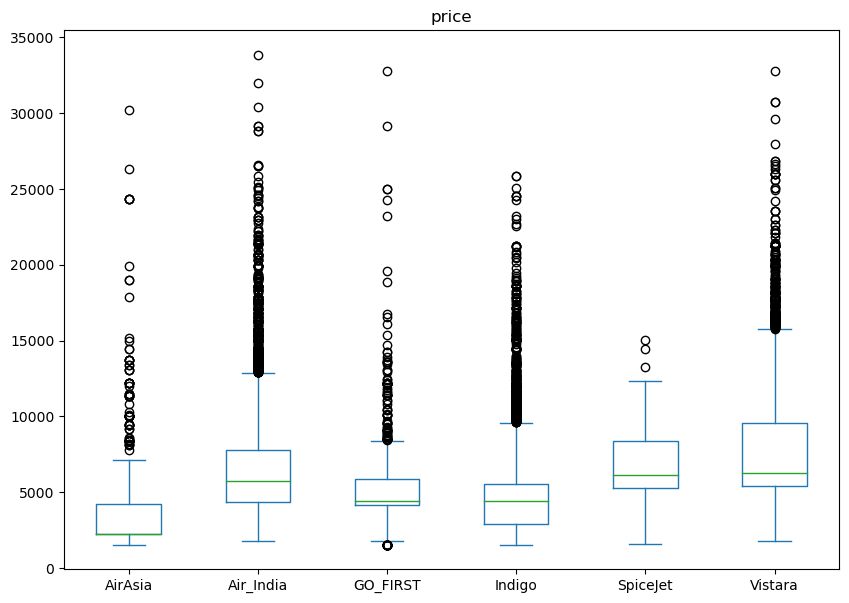

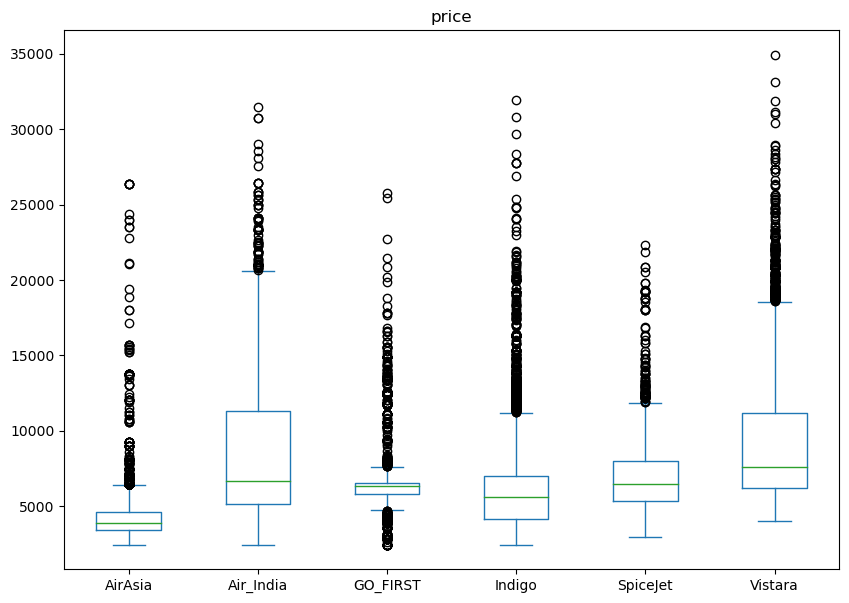

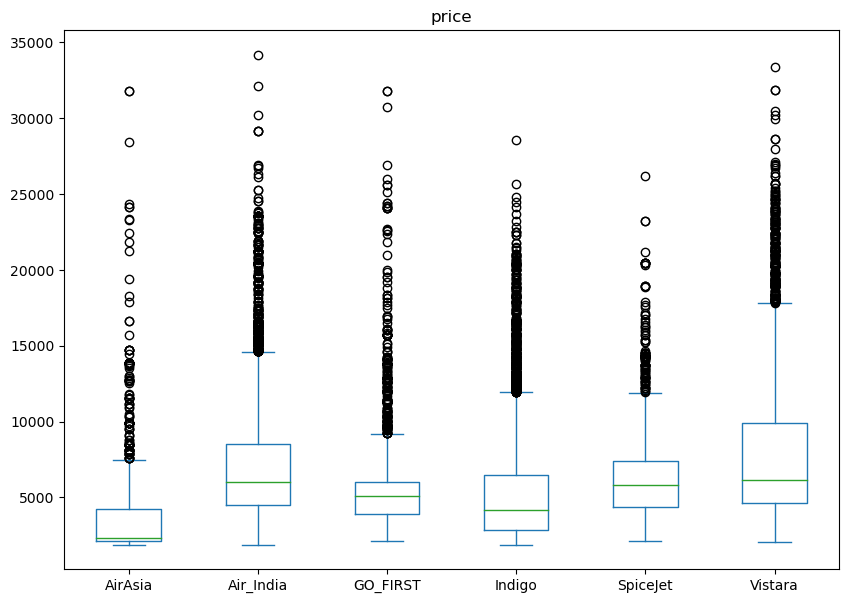

In [46]:
# Visualize the distribution of Economy class flight prices from different airlines, grouped by source city
flights[['airline', 'price', 'source_city']].loc[(flights['class'] == 'Economy')].groupby('source_city').plot.box(by = 'airline', figsize=(10, 7));

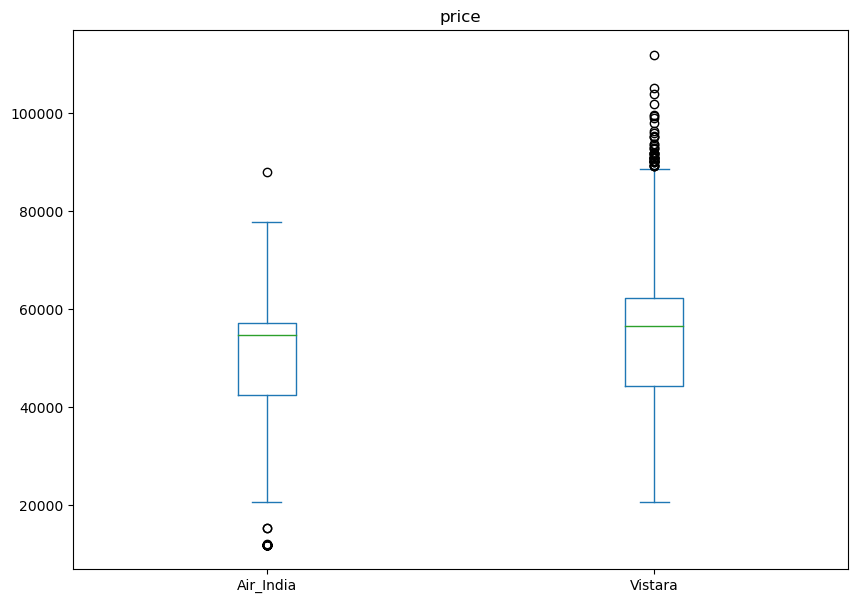

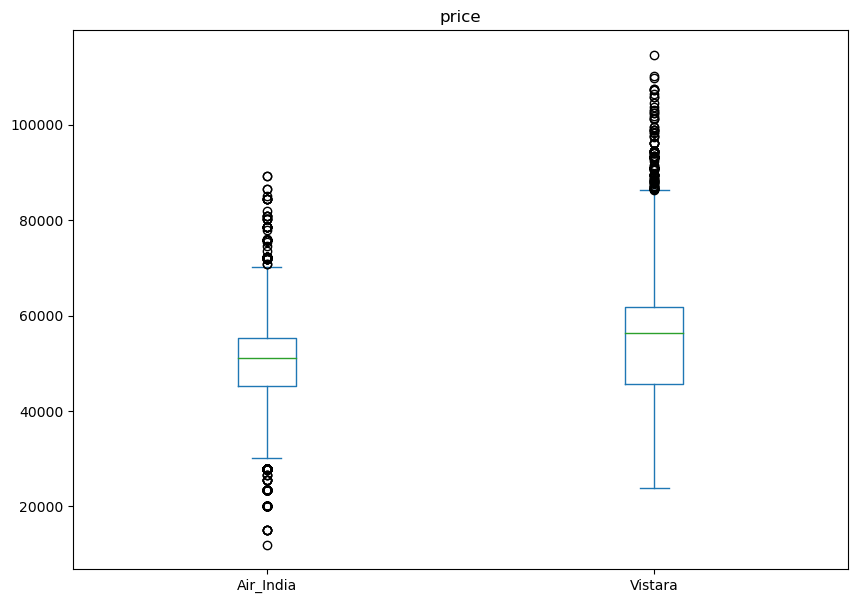

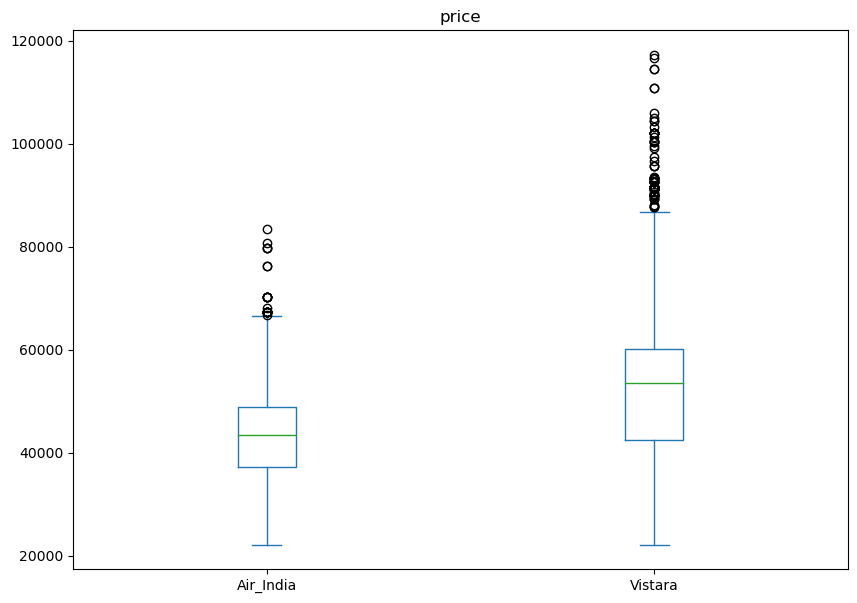

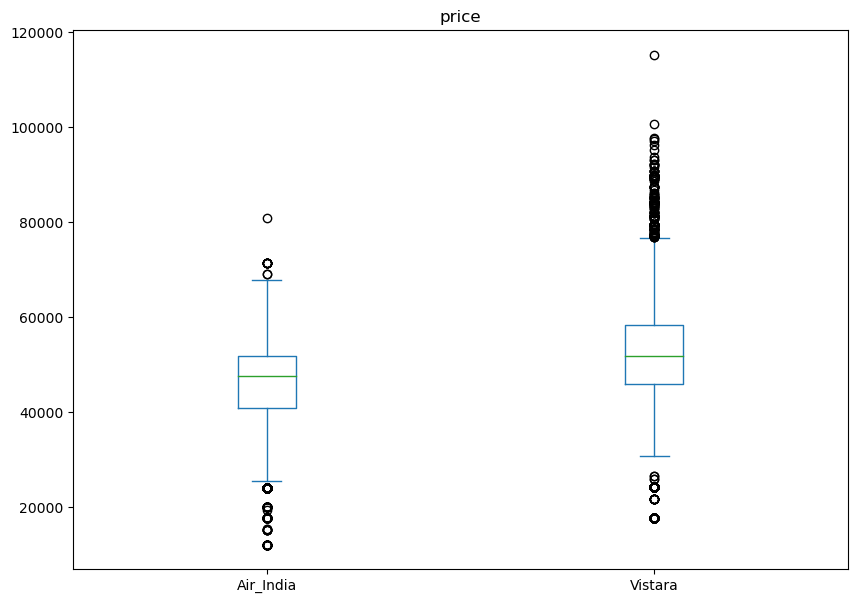

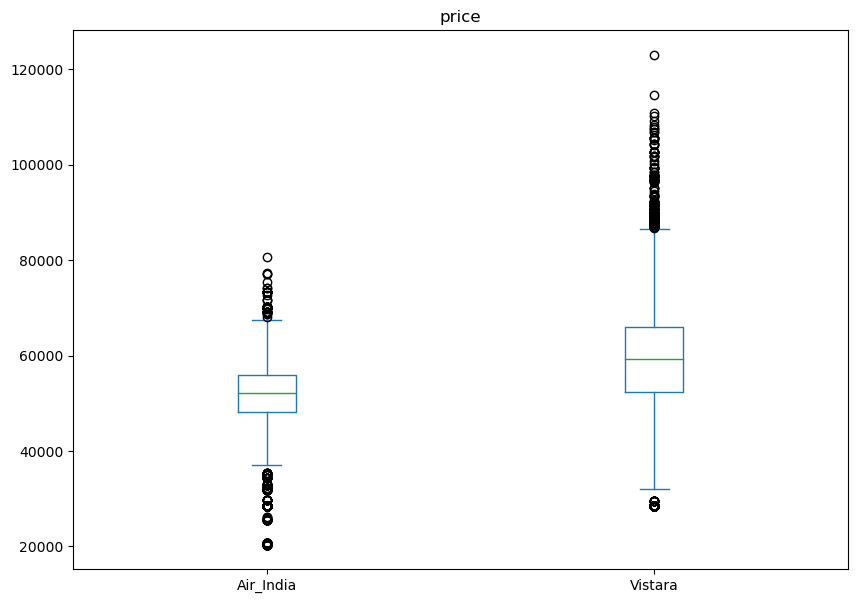

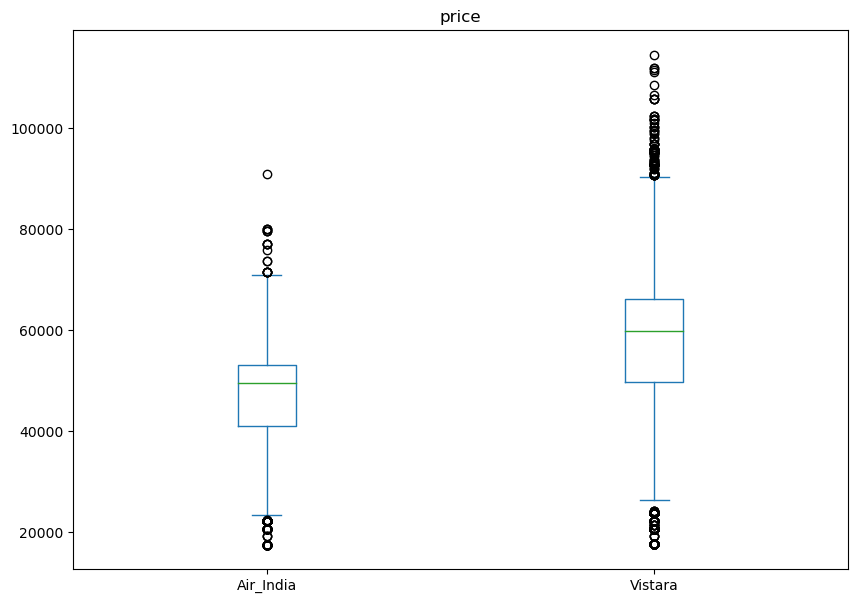

In [47]:
# Visualize the distribution of Business class flight prices from different airlines, grouped by source city, using a box plot.
flights[['airline', 'price', 'source_city']].loc[(flights['class'] == 'Business')].groupby('source_city').plot.box(by = 'airline', figsize=(10, 7));

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> Notably, Air India and Vistara consistently exhibit high pricing, with Kolkata and Mumbai emerging as particularly pricey `source_city`s for both airlines. SpiceJet also demonstrates occasional high pricing trends. 

> In contrast, for all `source_city`s, Air Asia emerges as the most economical option following Air India, while Chennai and Hyderabad are relatively more cost-effective. Mumbai's economy class fares exhibit unpredictability, with pricing patterns closely aligning with those of other major carriers. 

> Additionally, Vistara's services from Mumbai and Kolkata tend to be on the higher end of the pricing spectrum.

#### Analyzing the `destination_city` attribute :

In [48]:
# Extracting and displaying relevant columns
cities = flights[['source_city','airline','class','destination_city', 'price']]
cities.head()

source_city   airline    class destination_city  price
0       Delhi  SpiceJet  Economy           Mumbai   5953
1       Delhi  SpiceJet  Economy           Mumbai   5953
2       Delhi   AirAsia  Economy           Mumbai   5956
3       Delhi   Vistara  Economy           Mumbai   5955
4       Delhi   Vistara  Economy           Mumbai   5955

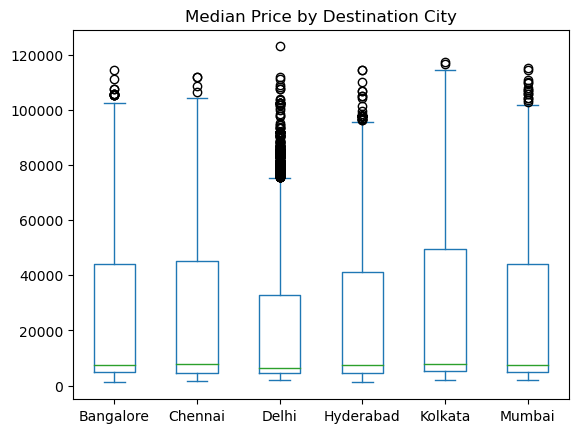

In [49]:
# Visualization of median prices by destination city
cities[['destination_city', 'price']].plot.box(by = 'destination_city')
plt.title('Median Price by Destination City');

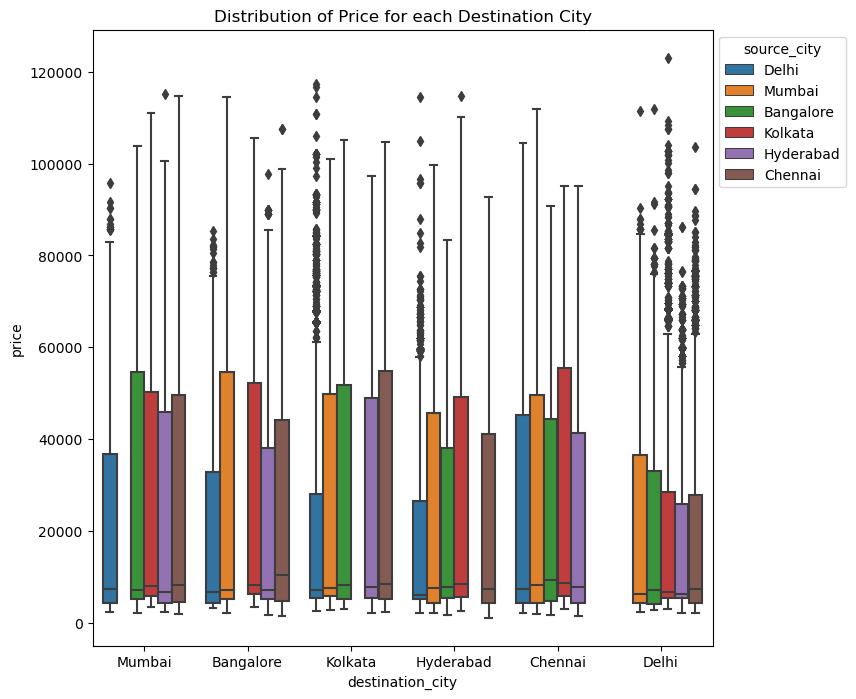

In [50]:
# Create a boxplot to visualize the distribution of 'price' for each 'destination_city'
# Colored by 'source_city', adjusting legend position.
plt.figure(figsize=(8, 8));
sns.boxplot(x='destination_city', y='price', hue='source_city',data=cities).legend(title='source_city',loc='upper left', bbox_to_anchor=(1, 1));
plt.title('Distribution of Price for each Destination City');

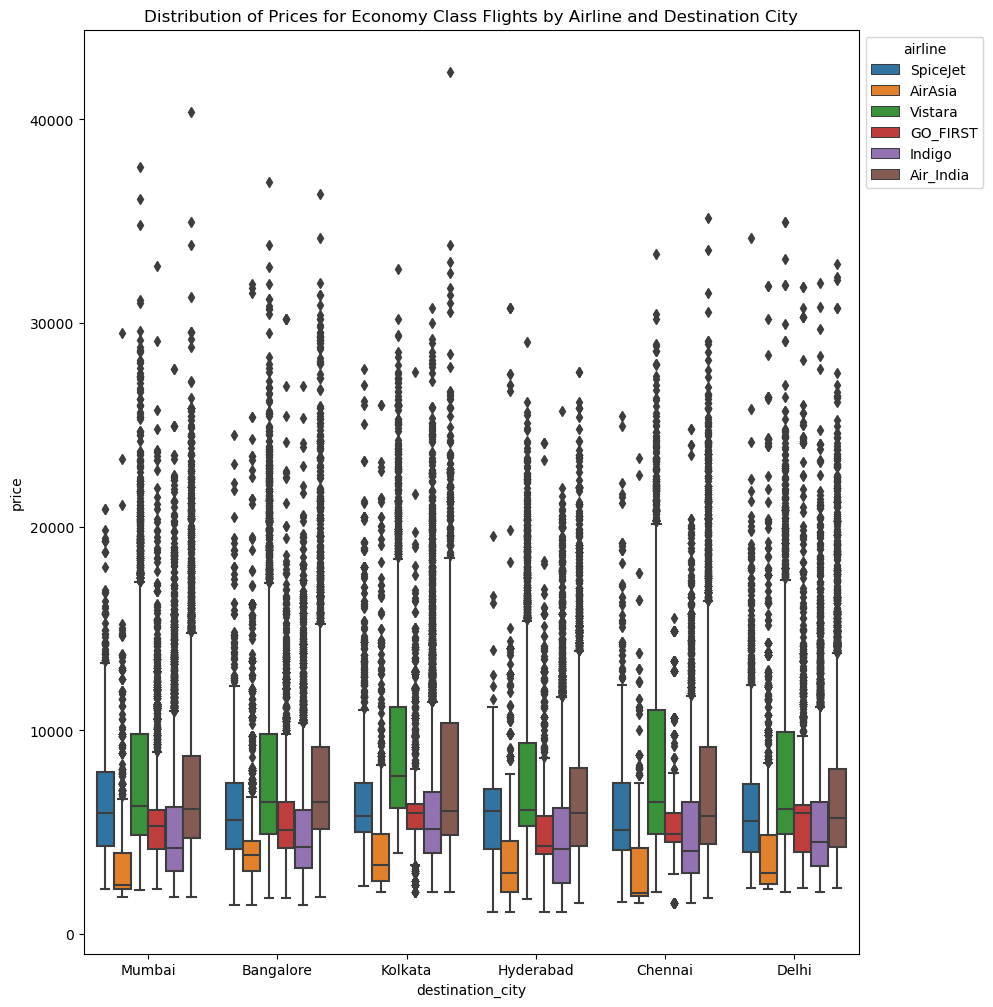

In [51]:
# Visualizing the distribution of prices for Economy class flights across different airlines in destination cities
cities_economy = cities.loc[cities['class'] == 'Economy']
plt.figure(figsize=(10, 12));
sns.boxplot(x='destination_city', y='price', hue='airline',data=cities_economy).legend(title='airline', loc='upper left', bbox_to_anchor=(1, 1));
plt.title('Distribution of Prices for Economy Class Flights by Airline and Destination City');

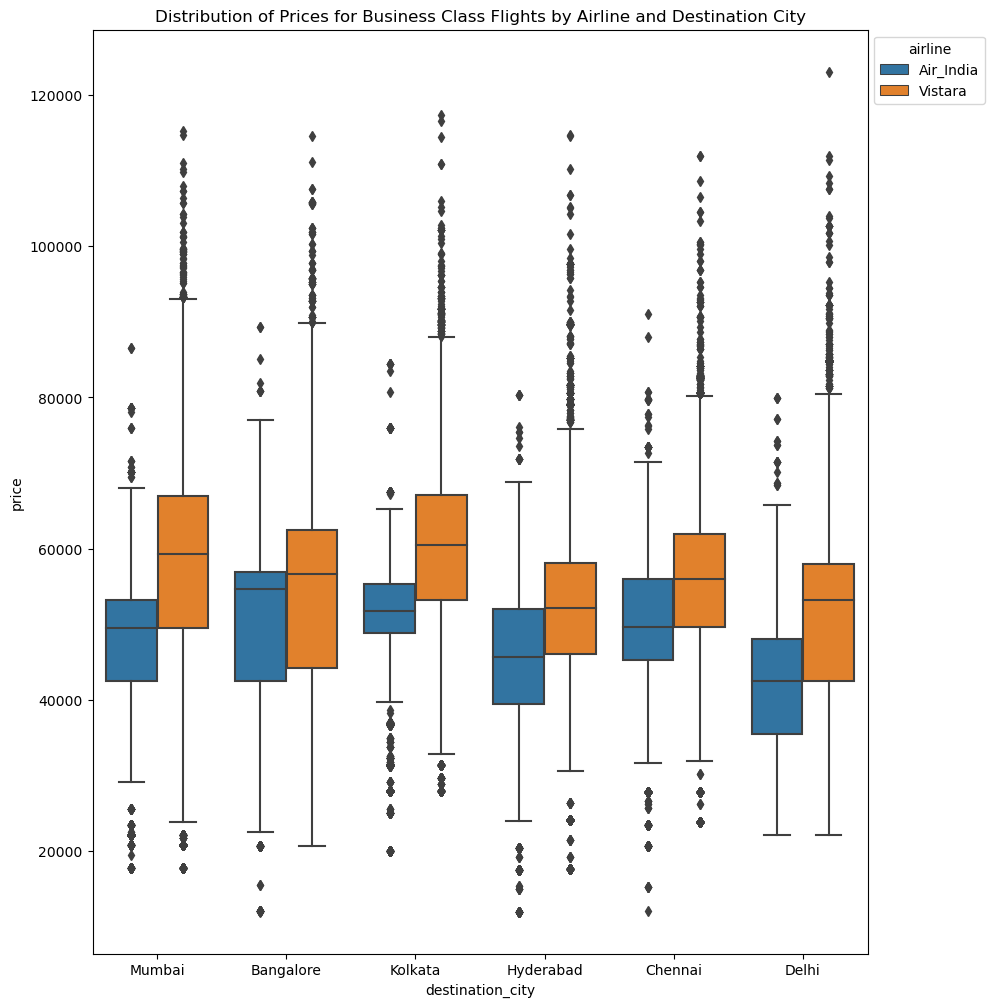

In [52]:
# Visualizing the distribution of prices for Business class flights across different airlines in destination cities
cities_business = cities.loc[cities['class'] == 'Business']
plt.figure(figsize=(10, 12));
sns.boxplot(x='destination_city', y='price', hue='airline',data=cities_business).legend(title='airline', loc='upper left', bbox_to_anchor=(1, 1));
plt.title('Distribution of Prices for Business Class Flights by Airline and Destination City');

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

>Flights to Delhi are consistently the most economical, despite some variability due to outliers. However, flying from Delhi is generally more affordable as well.

>Traveling to Chennai tends to be relatively expensive, especially the Kolkata to Chennai route, indicating potential cost challenges for passengers on this specific journey.

>Business class travelers can find the best value when flying to Delhi, while flights to Mumbai and Kolkata in this class come with higher costs and notable variability.

>Air Asia emerges as the most cost-effective airline, offering budget-friendly options for various destinations.

#### Analyzing the `days_left` attribute :

In [53]:
# Creating new dataframe
days_left = flights[['airline', 'class', 'days_left', 'price']]

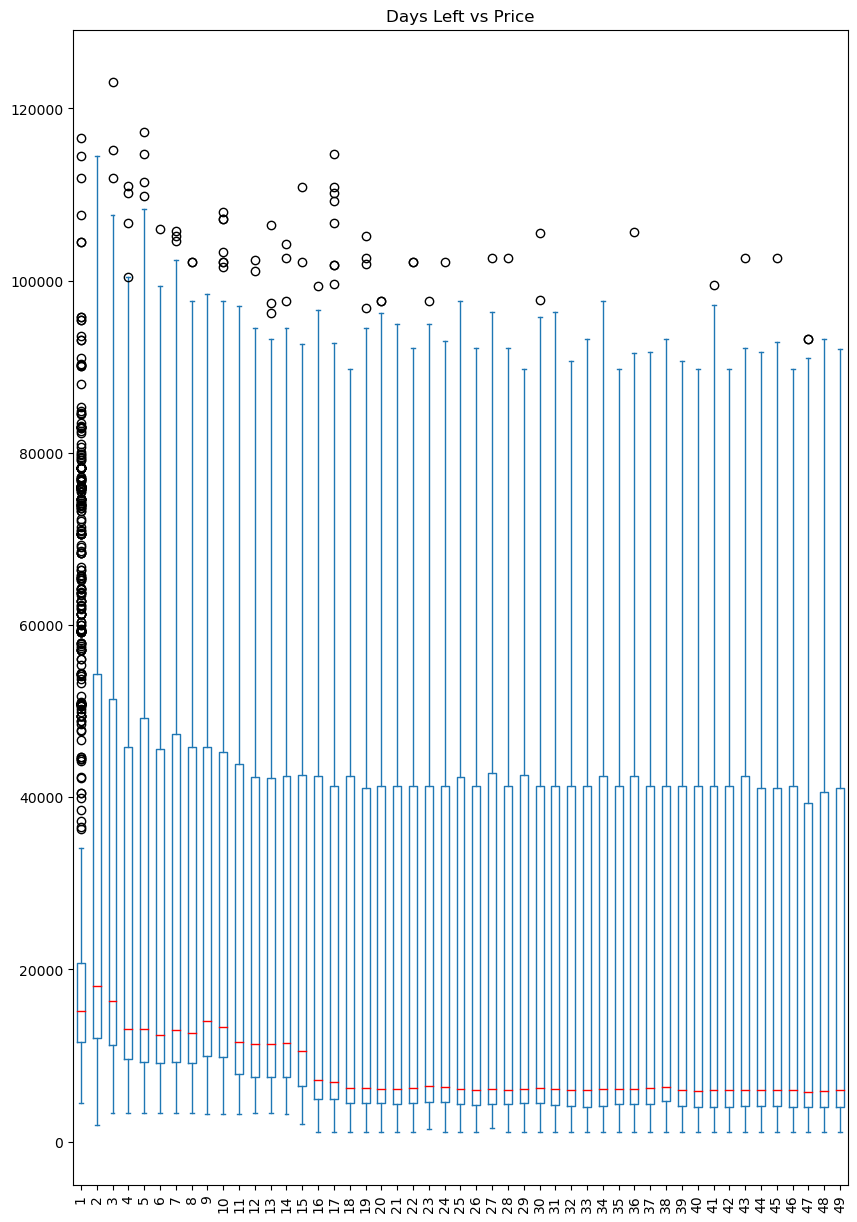

In [54]:
# Box plot for 'days_left' and 'price' columns, with red median lines, and adjusted figure size and x-axis labels
days_left[['days_left', 'price']].plot.box(by = 'days_left', medianprops={'color':'red'}, figsize=(10, 15));
plt.xticks(rotation='vertical');
plt.title('Days Left vs Price');

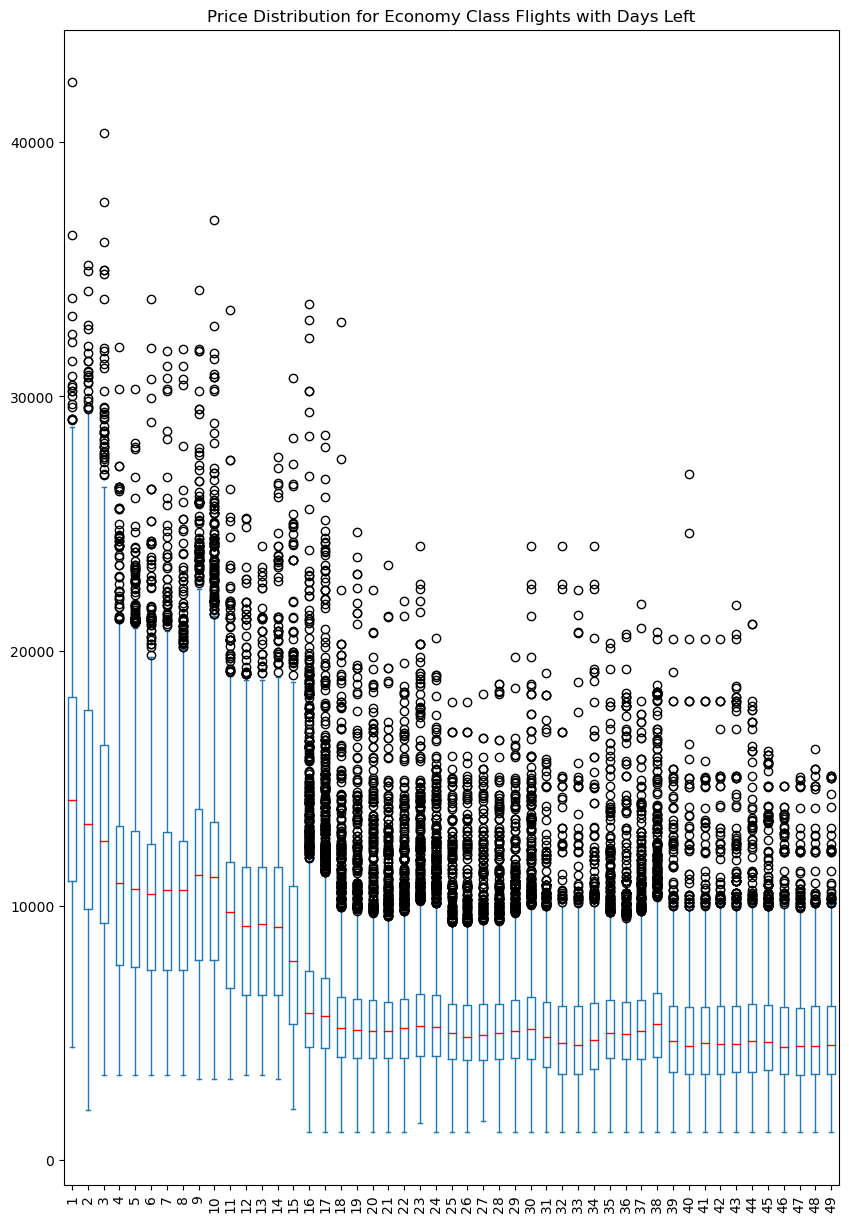

In [55]:
# Visualizing prices for Economy class flights based on days left for booking
days_left_economy = days_left.loc[days_left['class'] == 'Economy']
days_left_economy[['days_left', 'price']].plot.box(by = 'days_left', medianprops={'color':'red'}, figsize=(10, 15));
plt.xticks(rotation='vertical');
plt.title('Price Distribution for Economy Class Flights with Days Left');

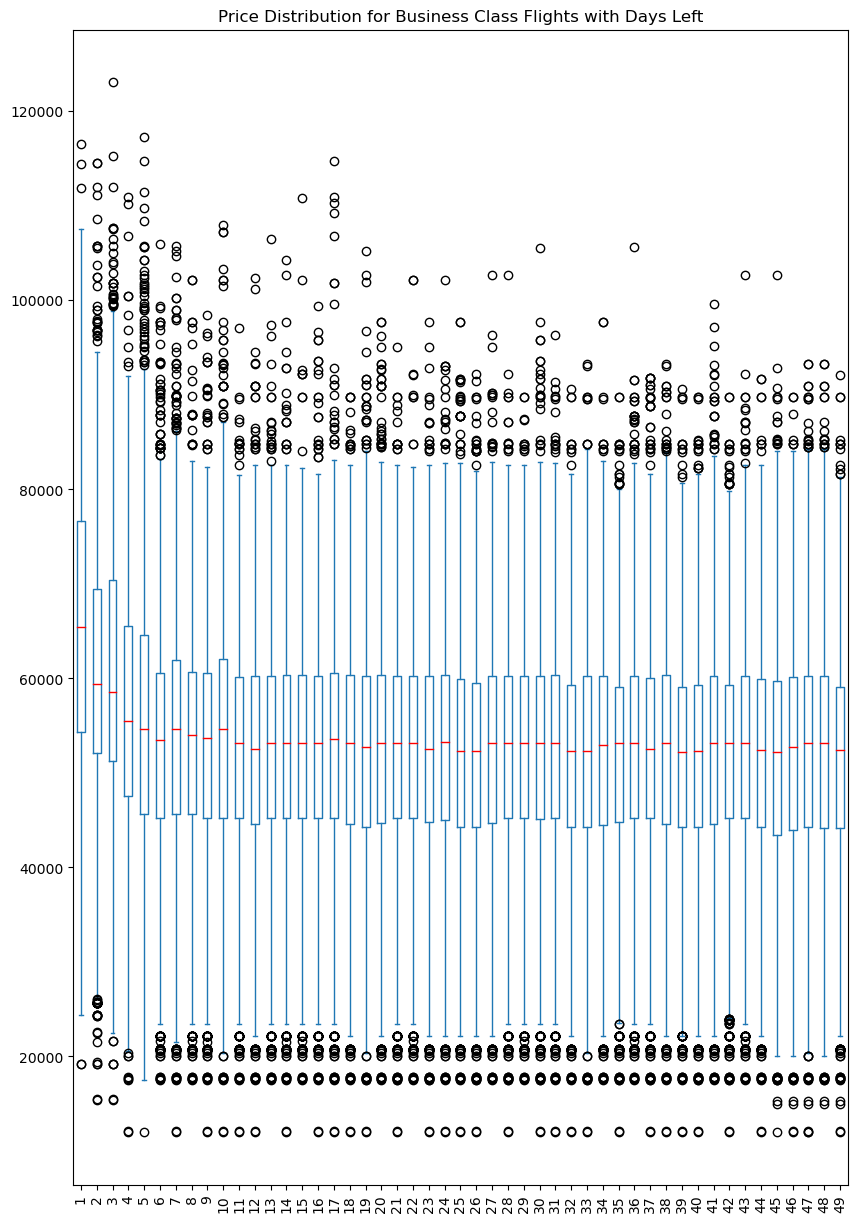

In [56]:
# Visualizing prices for Business class flights based on days left for booking
days_left_business = days_left.loc[days_left['class'] == 'Business']
days_left_business[['days_left', 'price']].plot.box(by = 'days_left', medianprops={'color':'red'}, figsize=(10, 15));
plt.xticks(rotation='vertical');
plt.title('Price Distribution for Business Class Flights with Days Left');

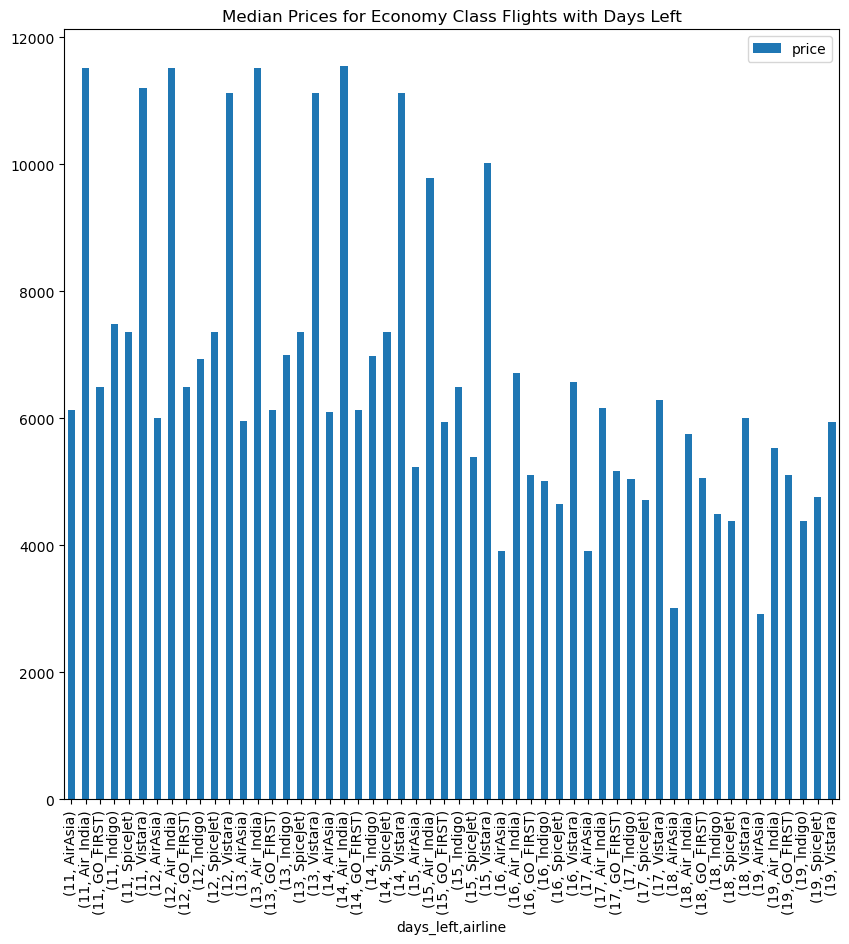

In [57]:
# Filter and visualize median prices for Economy class flights with days left 
# between 10 and 20 [since evaluating each of the unique values for this attribute is not feasible] 

days_left_airlines = days_left.loc[(days_left['class'] == 'Economy') & ((days_left['days_left'] < 20) & (days_left['days_left'] > 10))]
days_left_airlines[['airline', 'days_left', 'price']].groupby(['days_left', 'airline']).median(numeric_only = True).plot.bar(figsize=(10, 10));
plt.xticks(rotation='vertical');
plt.title('Median Prices for Economy Class Flights with Days Left');

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

>The pricing dynamics significantly vary based on the lead time before the scheduled departure. Booking 1 day before the trip exhibits considerable price volatility, lacking a discernible fixed range. Conversely, the optimal window for securing the most favorable prices falls between 40 to 49 days before the journey, indicating that advanced planning during this period is advantageous.

>Business class fares demonstrate a noteworthy stability, with prices remaining relatively constant across various days left before departure. Notably, the influence of lead time becomes more pronounced when booking within 10 days of the journey.

>In contrast, economy class prices experience a discernible increase when booking less than 1 day before the trip. Furthermore, the variability in economy class prices is notably higher compared to the more stable business class fares.

>AirAsia consistently emerges as the most cost-effective option, regardless of the lead time before the journey. Conversely, Vistara and Air India exhibit higher price points across the spectrum of days left, emphasizing their relatively higher costs irrespective of booking timing.


#### Analyzing the `departure_time` and `arrival_time` attribute :

In [58]:
# Calculate the median price for each departure time value
flights[['departure_time', 'price']].groupby('departure_time').median()

price
departure_time        
Afternoon       6663.0
Early_Morning   7212.0
Evening         7425.0
Late_Night      4499.0
Morning         8112.0
Night           7813.0

In [59]:
# Calculate the median price for each departure time value
flights[['arrival_time', 'price']].groupby('arrival_time').median()

price
arrival_time         
Afternoon      6714.0
Early_Morning  5800.0
Evening        8854.0
Late_Night     4867.0
Morning        7687.0
Night          7584.0

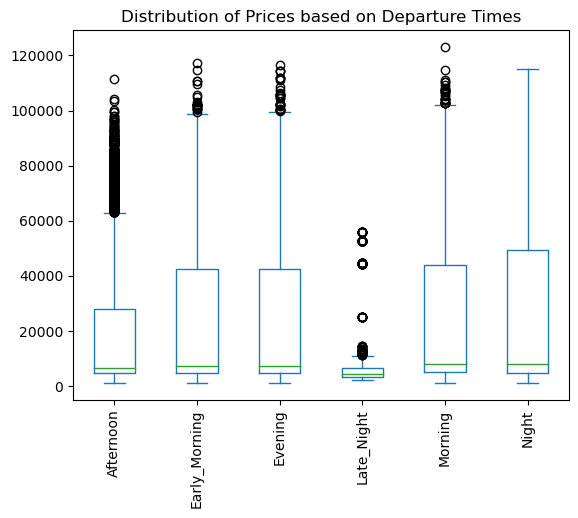

In [60]:
# Visualize the distribution of prices based on departure times
flights[['departure_time', 'price']].plot.box(by = 'departure_time')
plt.xticks(rotation='vertical');
plt.title('Distribution of Prices based on Departure Times');

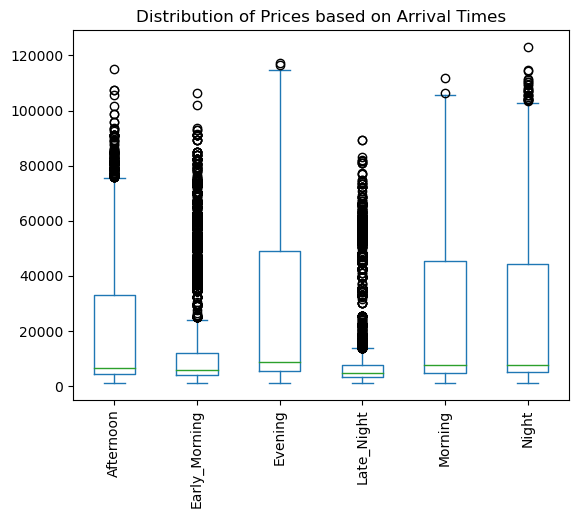

In [61]:
# Visualize the distribution of prices based on arrival times
flights[['arrival_time', 'price']].plot.box(by = 'arrival_time')
plt.xticks(rotation='vertical');
plt.title('Distribution of Prices based on Arrival Times');

<p style='color: Black; font-size:16px; font-weight: bold'>Inferences</p>

> Afternoon departures tend to be the most cost-effective, albeit with some variability. Late-night departures consistently offer the lowest prices. Morning and night flight departures are associated with higher costs. 

> Similarly, late-night arrivals are generally the most economical, followed by early-morning and afternoon arrivals. However, the pricing of arriving flights is notably variable and appears to be influenced by various factors.

<hr>

## Conclusions and Key Insights📝
<a id='conclusions'></a>

In conclusion, the exploration of this dataset proved to be both engaging and insightful, unraveling a wealth of information and providing valuable insights. The richness of the data made the analysis a compelling and rewarding experience.

**Following are the most valuable key insights from the analysis :**

1. **Carrier Price Variability:**
   - *Vistara Dominance:* Vistara boasts the largest share of total flights over 50 days, indicating a prominent presence in the dataset.
   - *Airline Price Ranges:* Varied price ranges among airlines, particularly in Air India and Vistara, suggest diverse service or ticket options. Smaller ranges in AirAsia, GoFirst, SpiceJet, and Indigo hint at more consistent and potentially affordable pricing structures.
<br><br>
2. **Price Distribution and Outliers:**
   - *Median Significance:* Median prices offer a stable measure of central tendency amidst significant price variability or outliers.
   - *Class Disparities:* Business class fares consistently surpass economy class, with Air India Business priced lower than Vistara Business. AirAsia Economy emerges as the most economical.
<br><br>
3. **City-based Pricing Trends:**
   - *Source City Impact:* Price distributions based on the source city reveal varying patterns. Delhi and Kolkata show notable variability, while flights from Delhi tend to be more affordable.
   - *Airline-Specific Trends:* Air India and Vistara consistently exhibit higher pricing. Air Asia stands out as the most economical option.
<br><br>
4. **Destination Dynamics:**
   - *Economical Destinations:* Flights to Delhi consistently offer the most economical options. Kolkata to Chennai routes tend to be pricier, highlighting potential cost challenges for passengers on specific journeys.
<br><br>
5. **Booking Lead Time Insights:**
   - *Optimal Booking Window:* For the most favorable prices, plan and book 40 to 49 days in advance. Booking 1 day before the trip exhibits considerable price volatility.
   - *Class-specific Stability:* Business class fares remain stable, emphasizing the influence of lead time on economy class prices, which increase notably when booking within 1 day.
<br><br>
6. **Time-of-Day Pricing Patterns:**
   - *Afternoon Affordability:* Afternoon departures tend to be the most cost-effective, with late-night departures consistently offering the lowest prices. Morning and night departures are associated with higher costs.
   - *Arrival Dynamics:* Late-night arrivals are generally the most economical, while the pricing of arriving flights varies significantly, influenced by diverse factors.


<hr>

## Improvements and Discussion🚧
<a id='improvements'></a>

While this project marks an insightful exploration of the flight booking dataset, there are several areas for improvement and potential avenues for further analysis. Reflecting on the process, the following considerations emerge:


   - The project primarily utilized Matplotlib for visualizations. Consider incorporating Seaborn, a powerful data visualization library built on top of Matplotlib. Seaborn offers a high-level interface for drawing attractive and informative statistical graphics, which could bring a more aesthetic and detailed dimension to the visual insights.
<br><br>
   - Numpy, a fundamental library for scientific computing, could be integrated into the analysis process. Its functionalities for working with arrays and mathematical operations might facilitate the extraction of more specific groups of data, providing a deeper and more nuanced understanding of the dataset.
<br><br>
   - The project focused on key variables such as airline, source city, destination, and lead time. However, variables like duration and the number of stops could offer valuable insights into travel patterns and preferences. Future analyses could explore these variables to uncover hidden relationships and enhance the overall depth of understanding.
<br><br>
   - While the project covered various aspects of the dataset, there might be other meaningful relationships between variables that were not explored. Conducting a more exhaustive examination could reveal additional insights, contributing to a comprehensive understanding of the factors influencing flight prices and traveler choices.
<br><br>
   - Incorporating statistical analysis and hypothesis testing could add a layer of rigor to the findings. This would involve testing hypotheses about the relationships between different variables, providing a more robust foundation for the insights derived from the dataset.
<br><br>
   - Considering the interactive nature of Jupyter Notebooks, incorporating interactive visualizations using libraries like Plotly could offer a dynamic exploration experience for users, enabling them to interact with the data and draw their own conclusions.
<br><br>
   - Enhance documentation and code structure for better clarity and readability. Clear comments, well-organized code, and detailed explanations can improve the project's accessibility and reproducibility.

In conclusion, this project serves as an excellent starting point for data analysis, and the identified areas for improvement offer exciting opportunities for further refinement and exploration. Embracing these suggestions can lead to a more comprehensive, insightful, and polished analysis of flight booking trends.

# Thank you.